In [1]:
#pip install --upgrade vnstock

In [2]:
import vnstock as vn
from datetime import datetime 
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import pandas_ta as ta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")

In [3]:
last_stock_list = ['VND', 'VIX', 'SHS', 'TVS']

In [4]:
# Đặt thời điểm kết thúc là ngày 22/01/2024
#end = datetime.now()
end = datetime(2024, 1, 22)

# Đặt thời điểm bắt đầu là 1 năm trước thời điểm kết thúc
start = datetime(end.year - 1, end.month, end.day)

# Chuyển đổi thành định dạng chuỗi 'YYYY-MM-DD'
start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

for stock in last_stock_list:
    # Tạo DataFrame cho cổ phiếu và đặt cột "time" làm index
    stock_data = vn.stock_historical_data(stock, start, end, resolution='1D', type='stock')
    stock_data = stock_data.set_index("time")
    
    # Lưu DataFrame vào biến globals()
    globals()[stock] = stock_data


company_list = [VND, VIX, SHS, TVS]
company_name = ["Chứng khoán VnDirect", "Chứng khoán Vietstock", 
                "Chứng khoán SG - HN", "Chứng khoán Thiên Việt" ]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    





In [5]:
df = pd.concat(company_list, axis=0)
#df.time = pd.to_datetime(df.time)
#df = df.set_index("time")
df.tail(10)


open   high    low  close  volume ticker            company_name
time                                                                         
2024-01-09  21500  21600  21250  21300   49100    TVS  Chứng khoán Thiên Việt
2024-01-10  21300  21350  21150  21300   12100    TVS  Chứng khoán Thiên Việt
2024-01-11  21250  21800  21050  21350   25600    TVS  Chứng khoán Thiên Việt
2024-01-12  21050  21350  20900  21350   41900    TVS  Chứng khoán Thiên Việt
2024-01-15  21500  21500  21150  21400   11200    TVS  Chứng khoán Thiên Việt
2024-01-16  21050  21300  20900  20950   48000    TVS  Chứng khoán Thiên Việt
2024-01-17  21000  21400  20800  20800   63900    TVS  Chứng khoán Thiên Việt
2024-01-18  20850  21100  20850  21100   19200    TVS  Chứng khoán Thiên Việt
2024-01-19  21100  21350  20900  21050   45200    TVS  Chứng khoán Thiên Việt
2024-01-22  21350  21350  20900  21050   52200    TVS  Chứng khoán Thiên Việt

In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
VND.describe()

open     high      low    close       volume
count   251.00   251.00   251.00   251.00       251.00
mean  18811.55 19149.00 18455.37 18769.92  26143537.45
std    3053.82  3104.31  3008.93  3054.68  12937628.92
min   13400.00 13800.00 13100.00 13400.00   6799000.00
25%   15650.00 15825.00 15400.00 15550.00  17544750.00
50%   19250.00 19600.00 18850.00 19300.00  24092800.00
75%   21450.00 21875.00 21000.00 21400.00  31235650.00
max   25200.00 25600.00 24700.00 25250.00 105878000.00

In [7]:
VIX.describe()

open     high      low    close      volume
count   251.00   251.00   251.00   251.00      251.00
mean  12494.65 12751.11 12204.06 12486.77 23547939.43
std    4619.11  4699.61  4482.85  4603.78 13902133.42
min    5740.00  5860.00  5680.00  5710.00  2264300.00
25%    7105.00  7270.00  6905.00  7135.00 13626850.00
50%   13300.00 13650.00 13050.00 13600.00 20654700.00
75%   16725.00 17000.00 16350.00 16700.00 31556050.00
max   20600.00 20750.00 19750.00 20600.00 73885104.00

In [8]:
SHS.describe()

open     high      low    close      volume
count   251.00   251.00   251.00   251.00      251.00
mean  14097.21 14490.04 13822.31 14172.11 21356886.84
std    3793.62  3889.46  3719.10  3811.14 10283901.23
min    7500.00  8300.00  7500.00  8000.00  3768100.00
25%   10250.00 10550.00 10100.00 10300.00 14598250.00
50%   14500.00 15100.00 14400.00 14700.00 19325500.00
75%   17650.00 18300.00 17300.00 17700.00 25560250.00
max   20600.00 20700.00 19800.00 20500.00 69713696.00

In [9]:
TVS.describe()

open     high      low    close    volume
count   251.00   251.00   251.00   251.00    251.00
mean  20474.83 20760.18 20074.43 20380.40  70860.16
std    3129.94  3173.87  3062.52  3106.77  80280.84
min   15300.00 15580.00 15080.00 15080.00    200.00
25%   16960.00 17260.00 16590.00 16790.00  14500.00
50%   20900.00 21000.00 20500.00 20850.00  44000.00
75%   23125.00 23500.00 22775.00 23050.00  94300.00
max   28000.00 28400.00 27000.00 27600.00 488900.00

- Số lượng dữ liệu: Tất cả các mã đều có 251 điểm dữ liệu.
- Giá trung bình: TVS có giá đóng cửa trung bình cao nhất (20,380.40), tiếp theo là VND (18,769.92) , SHS (14,172.11), và VIX (12,486.77).
- Độ biến động: VIX có độ biến động cao nhất (độ lệch chuẩn cao nhất), tiếp theo là SHS, TVS và VND.
- Khối lượng giao dịch: VND có khối lượng giao dịch trung bình cao nhất, TVS có khối lượng giao dịch trung bình thấp nhất.


## Closing Price

<Figure size 5120x3840 with 0 Axes>

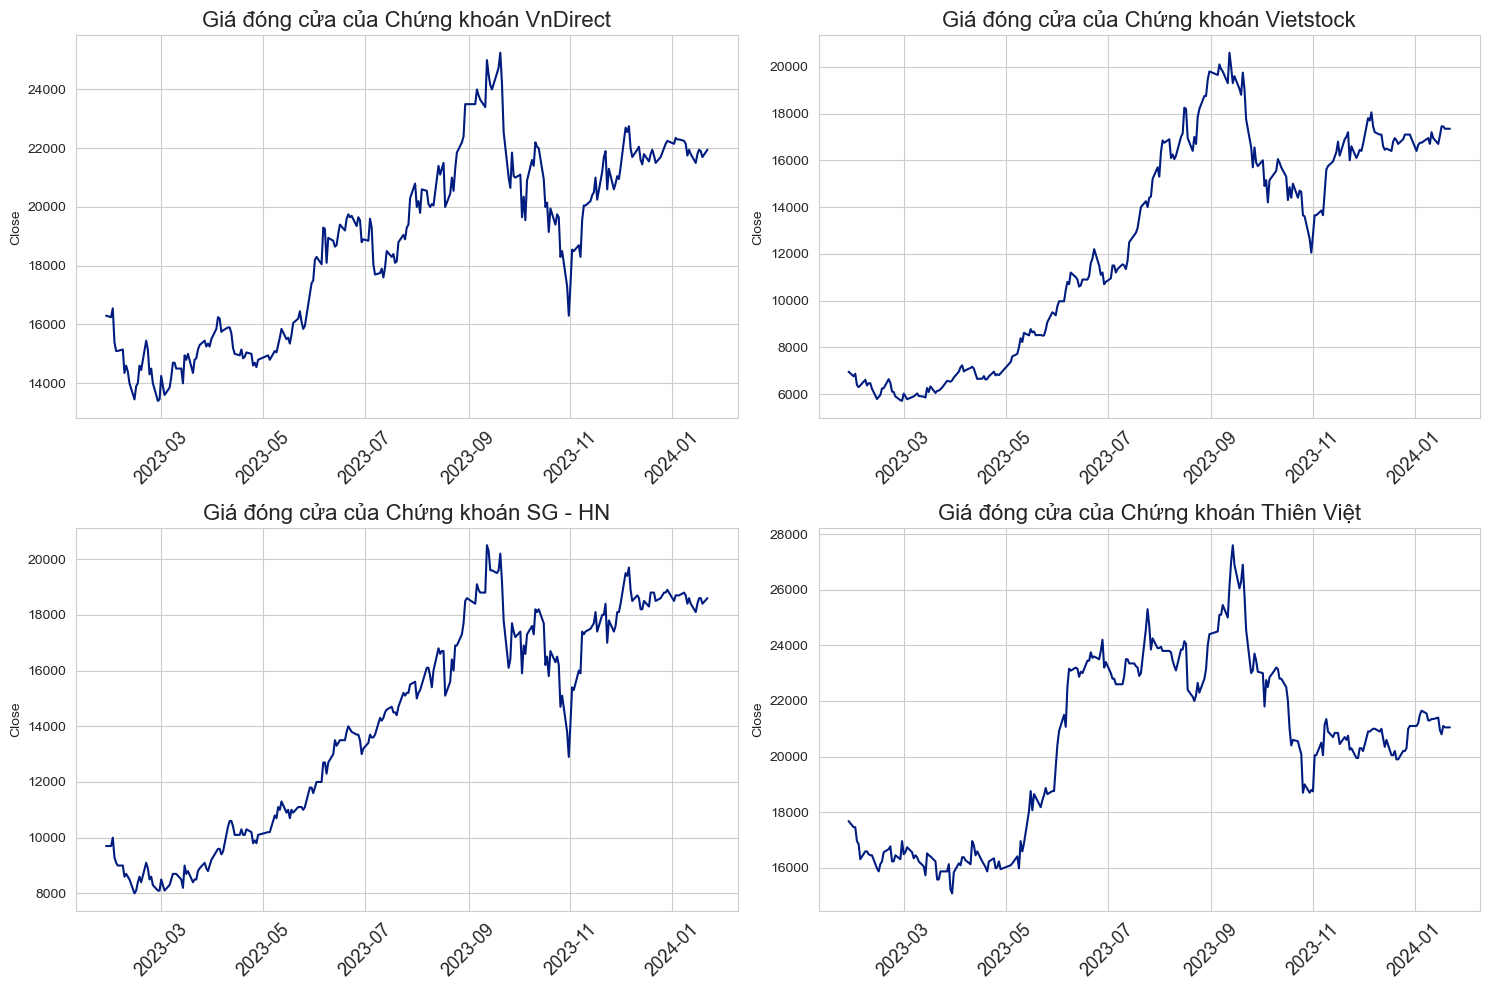

<Figure size 5120x3840 with 0 Axes>

In [10]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['close'] )
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.xticks(rotation = 45, fontsize=13)
    plt.title(f"Giá đóng cửa của {company_name[i - 1]}",
             fontsize=16)
    
plt.tight_layout()
#output_file_path = 'Closing_price.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

Ta thấy giá đóng cửa các cổ phiếu có xu hướng khá tương đồng, đều tăng mạnh ở tháng 5 và giảm mạnh trong tháng 9 đến tháng 11.

## Volume of Sales

<Figure size 5120x3840 with 0 Axes>

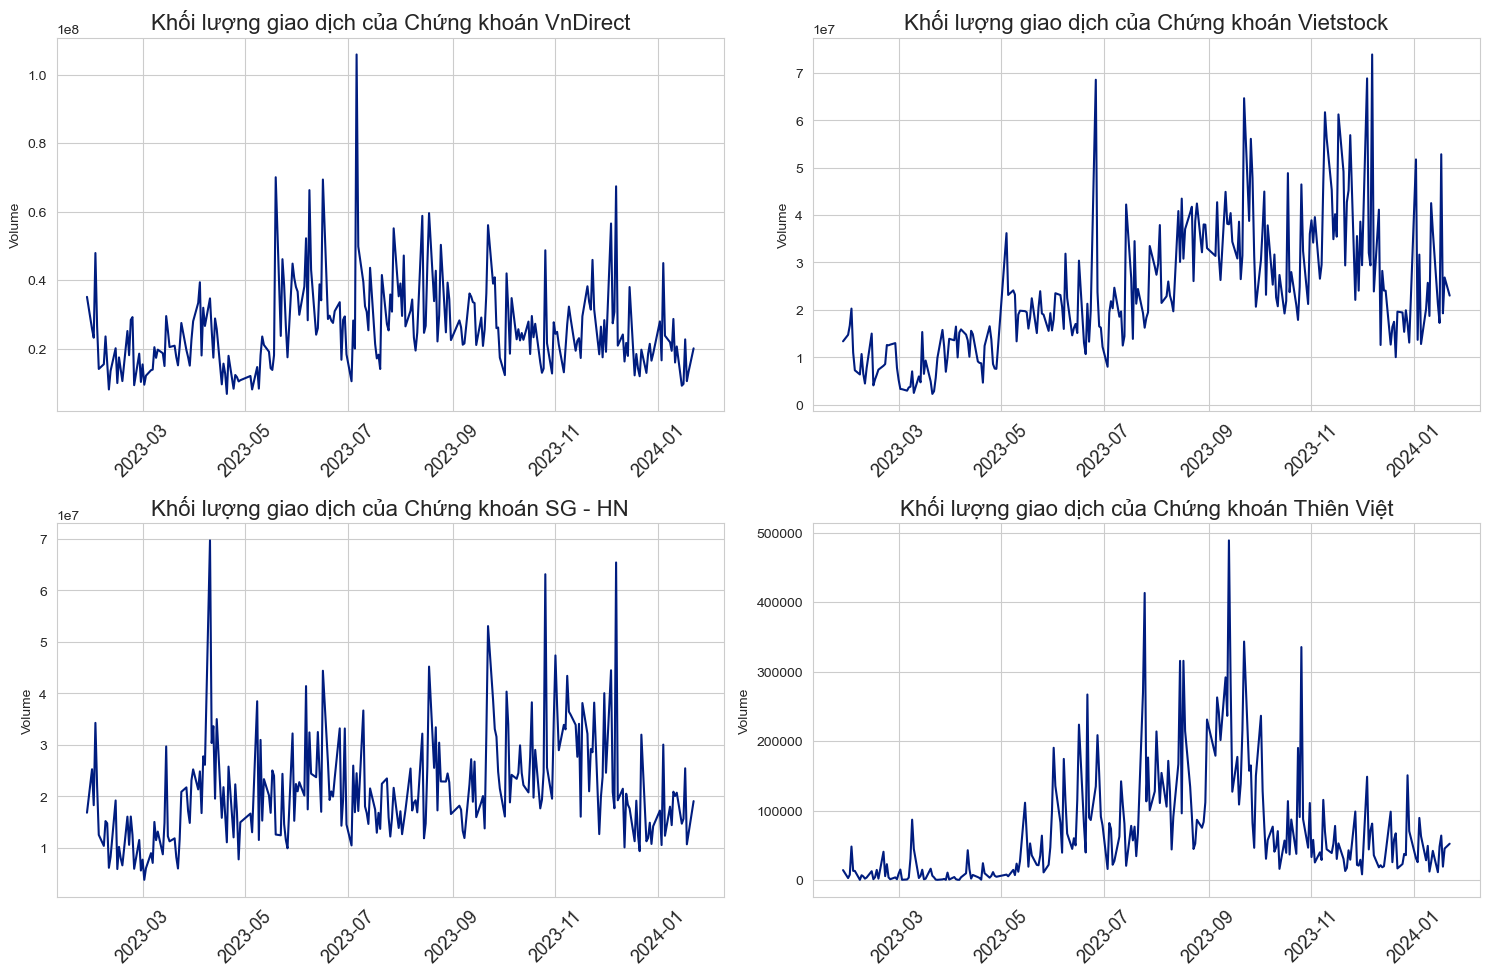

<Figure size 5120x3840 with 0 Axes>

In [11]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['volume'] )
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.xticks(rotation = 45, fontsize=13)
    plt.title(f"Khối lượng giao dịch của {company_name[i - 1]}",
             fontsize =16)
    
plt.tight_layout()
#output_file_path = 'Volume.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

Ta có thể thấy 3 mã cổ phiếu VND, VIX, TVS đều có khối lượng giao dịch đột biền ở tháng 6, tháng 7 dẫn đến xu hướng gia tăng “Giá đóng cửa “ từ tháng 7 cho tới đỉnh điểm ở tháng 9, tháng 10 của các cổ phiếu. 

## Moving average

<Figure size 5120x3840 with 0 Axes>

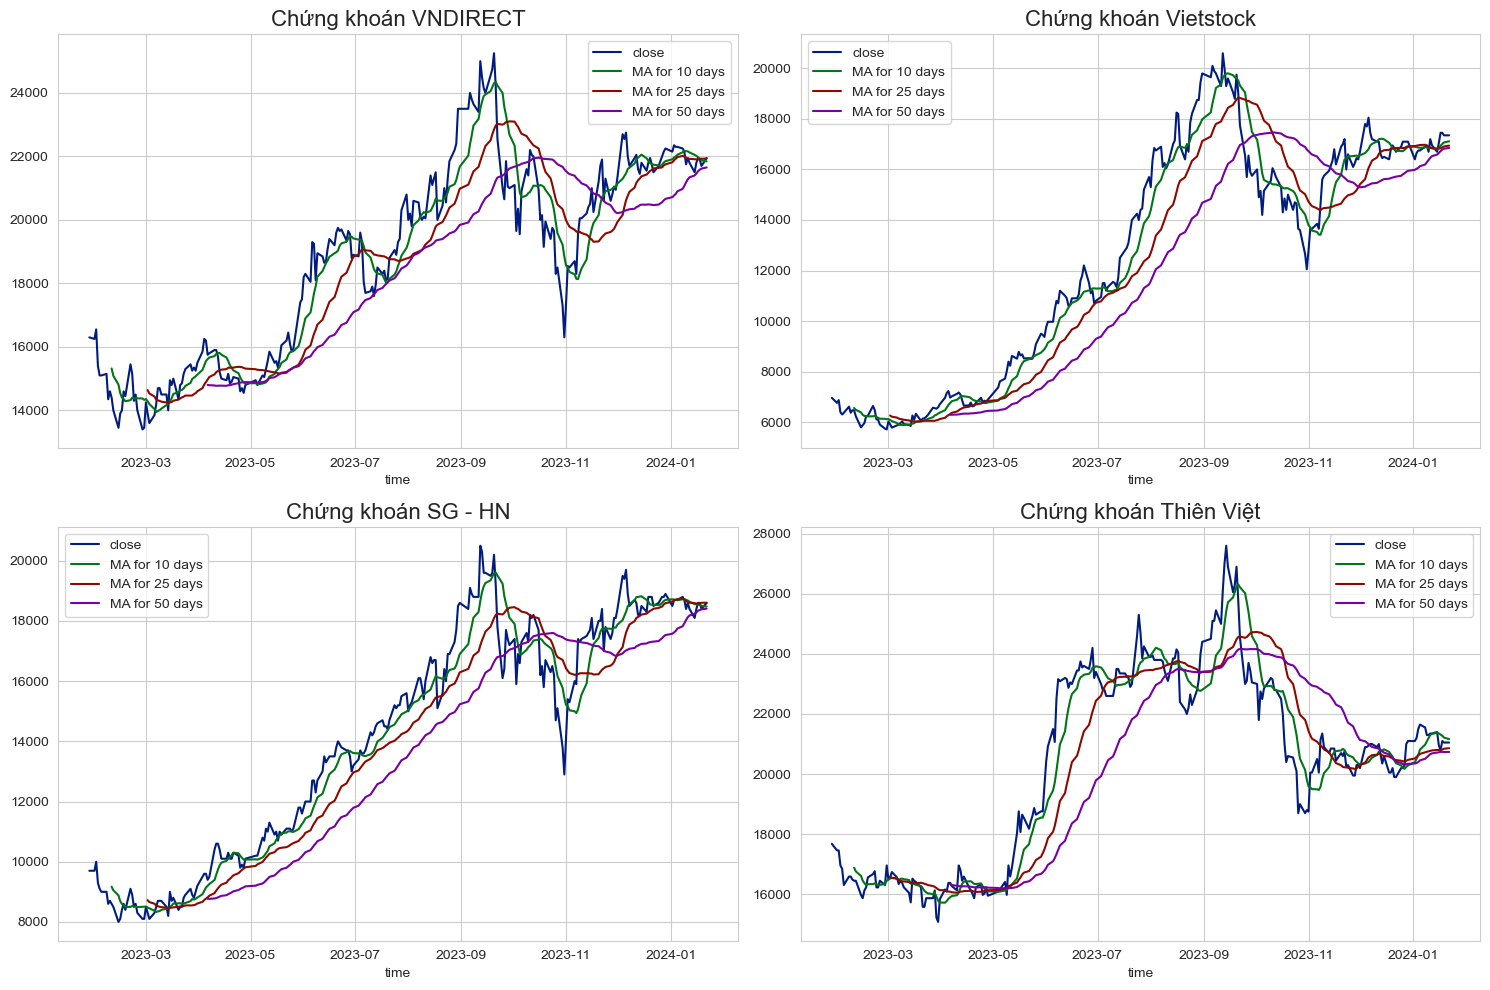

<Figure size 5120x3840 with 0 Axes>

In [12]:
ma_day = [10, 25, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VND[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Chứng khoán VNDIRECT', fontsize = 16)

VIX[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Chứng khoán Vietstock', fontsize = 16)

SHS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Chứng khoán SG - HN', fontsize = 16)

TVS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Chứng khoán Thiên Việt', fontsize = 16)

fig.tight_layout()
#output_file_path = 'MA.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

## The daily return of the stock on average

<Figure size 5120x3840 with 0 Axes>

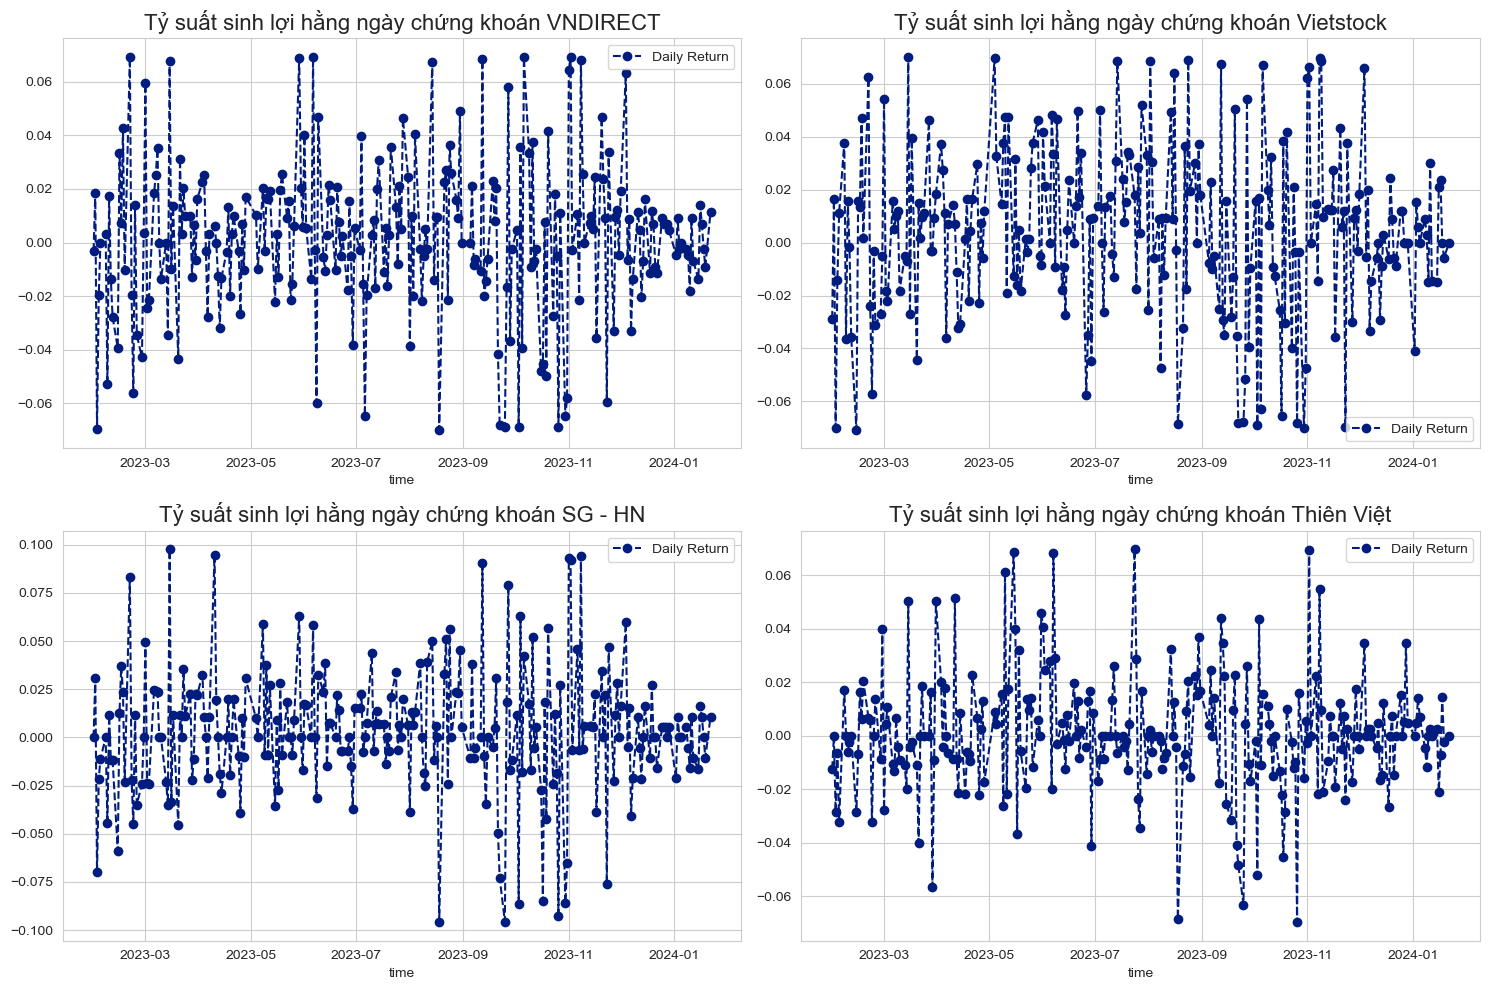

<Figure size 5120x3840 with 0 Axes>

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VND['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Tỷ suất sinh lợi hằng ngày chứng khoán VNDIRECT', fontsize = 16)

VIX['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Tỷ suất sinh lợi hằng ngày chứng khoán Vietstock', fontsize = 16)

SHS['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Tỷ suất sinh lợi hằng ngày chứng khoán SG - HN', fontsize = 16)

TVS['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Tỷ suất sinh lợi hằng ngày chứng khoán Thiên Việt', fontsize = 16)

fig.tight_layout()
#output_file_path = 'return.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

<Figure size 5120x3840 with 0 Axes>

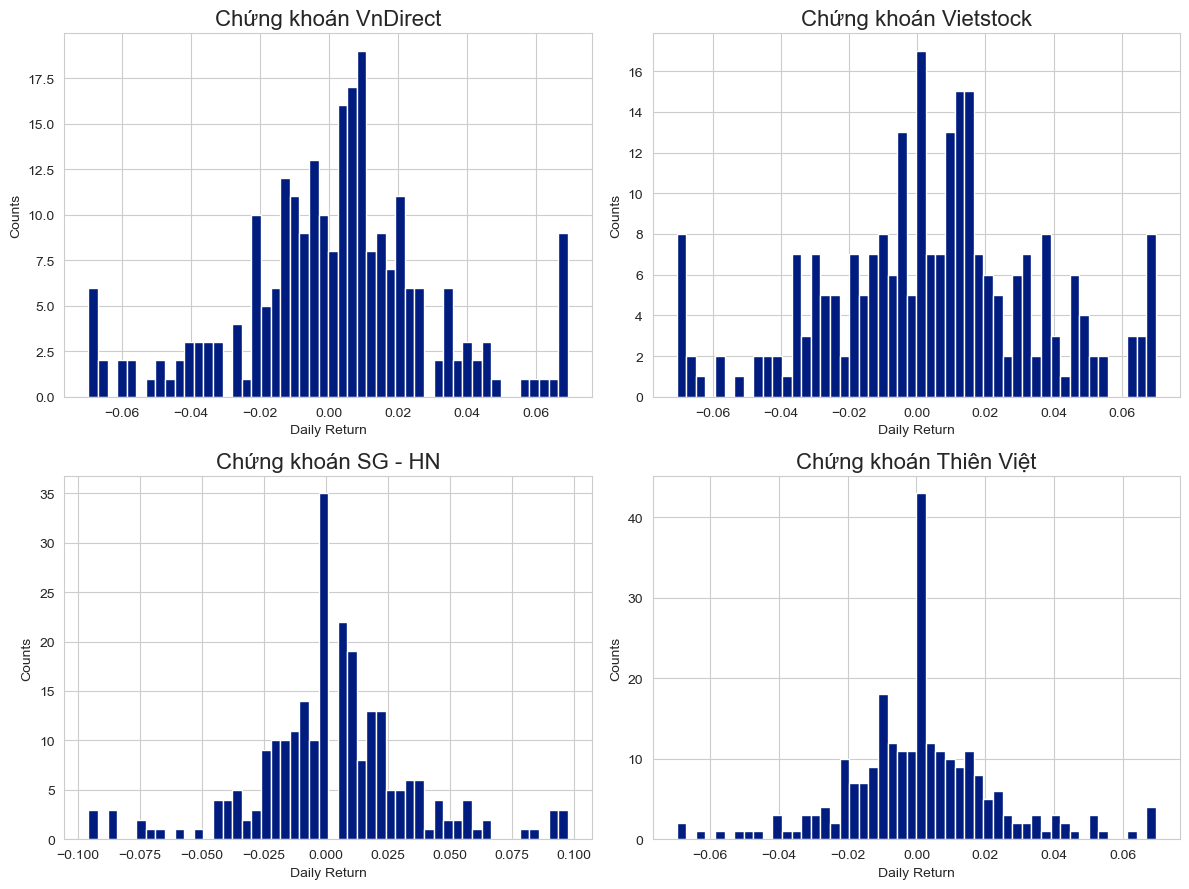

<Figure size 5120x3840 with 0 Axes>

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}', 
             fontsize = 16)
    
plt.tight_layout()
#output_file_path = 'dist_return.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

## The correlation between different stocks closing prices

In [15]:
df

open   high    low  close    volume ticker  \
time                                                      
2023-01-27  16750  16800  16300  16300  35127200    VND   
2023-01-30  16300  16800  16050  16250  25731200    VND   
2023-01-31  16300  16550  16050  16550  23205000    VND   
2023-02-01  16700  16750  15400  15400  47920200    VND   
2023-02-02  15550  15600  14850  15100  26600600    VND   
...           ...    ...    ...    ...       ...    ...   
2024-01-16  21050  21300  20900  20950     48000    TVS   
2024-01-17  21000  21400  20800  20800     63900    TVS   
2024-01-18  20850  21100  20850  21100     19200    TVS   
2024-01-19  21100  21350  20900  21050     45200    TVS   
2024-01-22  21350  21350  20900  21050     52200    TVS   

                      company_name  
time                                
2023-01-27    Chứng khoán VnDirect  
2023-01-30    Chứng khoán VnDirect  
2023-01-31    Chứng khoán VnDirect  
2023-02-01    Chứng khoán VnDirect  
2023-02-02    Chứng khoán VnDirect  
...                            ...  
2024-01-16  Chứng khoán Thiên Việt  
2024-01-17  Chứng khoán Thiên Việt  
2024-01-18  Chứng khoán Thiên Việt  
2024-01-19  Chứng khoán Thiên Việt  
2024-01-22  Chứng khoán Thiên Việt  

[1004 rows x 7 columns]

In [16]:
df2 = df.reset_index()
df2

time   open   high    low  close    volume ticker  \
0     2023-01-27  16750  16800  16300  16300  35127200    VND   
1     2023-01-30  16300  16800  16050  16250  25731200    VND   
2     2023-01-31  16300  16550  16050  16550  23205000    VND   
3     2023-02-01  16700  16750  15400  15400  47920200    VND   
4     2023-02-02  15550  15600  14850  15100  26600600    VND   
...          ...    ...    ...    ...    ...       ...    ...   
999   2024-01-16  21050  21300  20900  20950     48000    TVS   
1000  2024-01-17  21000  21400  20800  20800     63900    TVS   
1001  2024-01-18  20850  21100  20850  21100     19200    TVS   
1002  2024-01-19  21100  21350  20900  21050     45200    TVS   
1003  2024-01-22  21350  21350  20900  21050     52200    TVS   

                company_name  
0       Chứng khoán VnDirect  
1       Chứng khoán VnDirect  
2       Chứng khoán VnDirect  
3       Chứng khoán VnDirect  
4       Chứng khoán VnDirect  
...                      ...  
999   Chứng khoán Thiên Việt  
1000  Chứng khoán Thiên Việt  
1001  Chứng khoán Thiên Việt  
1002  Chứng khoán Thiên Việt  
1003  Chứng khoán Thiên Việt  

[1004 rows x 8 columns]

In [17]:
# Tạo DataFrame cho từng ticker
df_VND = df2[df2['ticker'] == 'VND'][['time', 'close']].set_index('time').rename(columns={'close': 'VND'})
df_VIX = df2[df2['ticker'] == 'VIX'][['time', 'close']].set_index('time').rename(columns={'close': 'VIX'})
df_SHS = df2[df2['ticker'] == 'SHS'][['time', 'close']].set_index('time').rename(columns={'close': 'SHS'})
df_TVS = df2[df2['ticker'] == 'TVS'][['time', 'close']].set_index('time').rename(columns={'close': 'TVS'})
df_vnindex = vn.stock_historical_data("VNINDEX", start, end, "1D", "index")
df_vnindex = df_vnindex[['time', 'close']].set_index('time').rename(columns={'close': 'VNINDEX'})

df_VND = df_VND.loc[~df_VND.index.duplicated(keep='first')]
df_VIX = df_VIX.loc[~df_VIX.index.duplicated(keep='first')]
df_SHS = df_SHS.loc[~df_SHS.index.duplicated(keep='first')]
df_TVS = df_TVS.loc[~df_TVS.index.duplicated(keep='first')]

# Kết hợp các DataFrame theo cột 'time'
closing_df = pd.concat([df_VND, df_VIX, df_SHS, df_TVS, df_vnindex], axis=1)

# Hiển thị DataFrame mới
closing_df


VND    VIX    SHS    TVS    VNINDEX
time                                             
2023-01-27  16300   6960   9700  17680 1117100.00
2023-01-30  16250   6760   9700  17460 1102570.00
2023-01-31  16550   6870  10000  17460 1111180.00
2023-02-01  15400   6390   9300  16960 1075970.00
2023-02-02  15100   6300   9100  16850 1077590.00
...           ...    ...    ...    ...        ...
2024-01-16  21800  17050  18400  20950 1163120.00
2024-01-17  21950  17450  18600  20800 1162530.00
2024-01-18  21900  17450  18600  21100 1169060.00
2024-01-19  21700  17350  18400  21050 1181500.00
2024-01-22  21950  17350  18600  21050 1182860.00

[251 rows x 5 columns]

In [18]:
stock_rets = closing_df.pct_change()
stock_rets

VND   VIX   SHS   TVS  VNINDEX
time                                       
2023-01-27   NaN   NaN   NaN   NaN      NaN
2023-01-30 -0.00 -0.03  0.00 -0.01    -0.01
2023-01-31  0.02  0.02  0.03  0.00     0.01
2023-02-01 -0.07 -0.07 -0.07 -0.03    -0.03
2023-02-02 -0.02 -0.01 -0.02 -0.01     0.00
...          ...   ...   ...   ...      ...
2024-01-16  0.01  0.02  0.02 -0.02     0.01
2024-01-17  0.01  0.02  0.01 -0.01    -0.00
2024-01-18 -0.00  0.00  0.00  0.01     0.01
2024-01-19 -0.01 -0.01 -0.01 -0.00     0.01
2024-01-22  0.01  0.00  0.01  0.00     0.00

[251 rows x 5 columns]

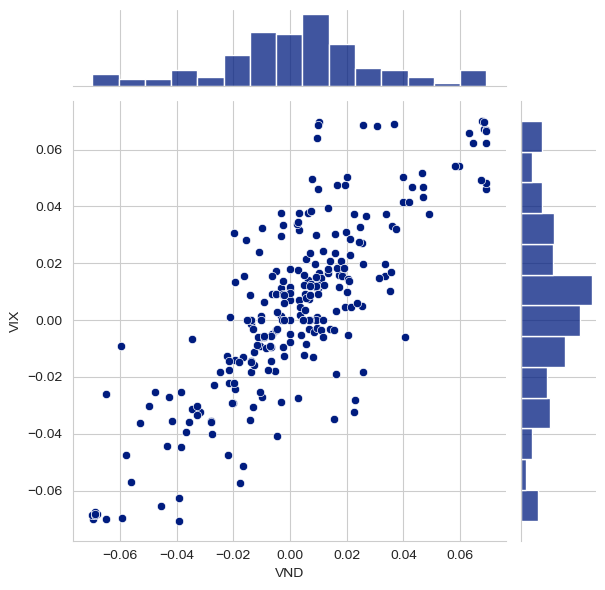

In [19]:
sns.jointplot(x='VND', y='VIX', data=stock_rets.reset_index(), kind='scatter')

<Figure size 12800x9600 with 0 Axes>

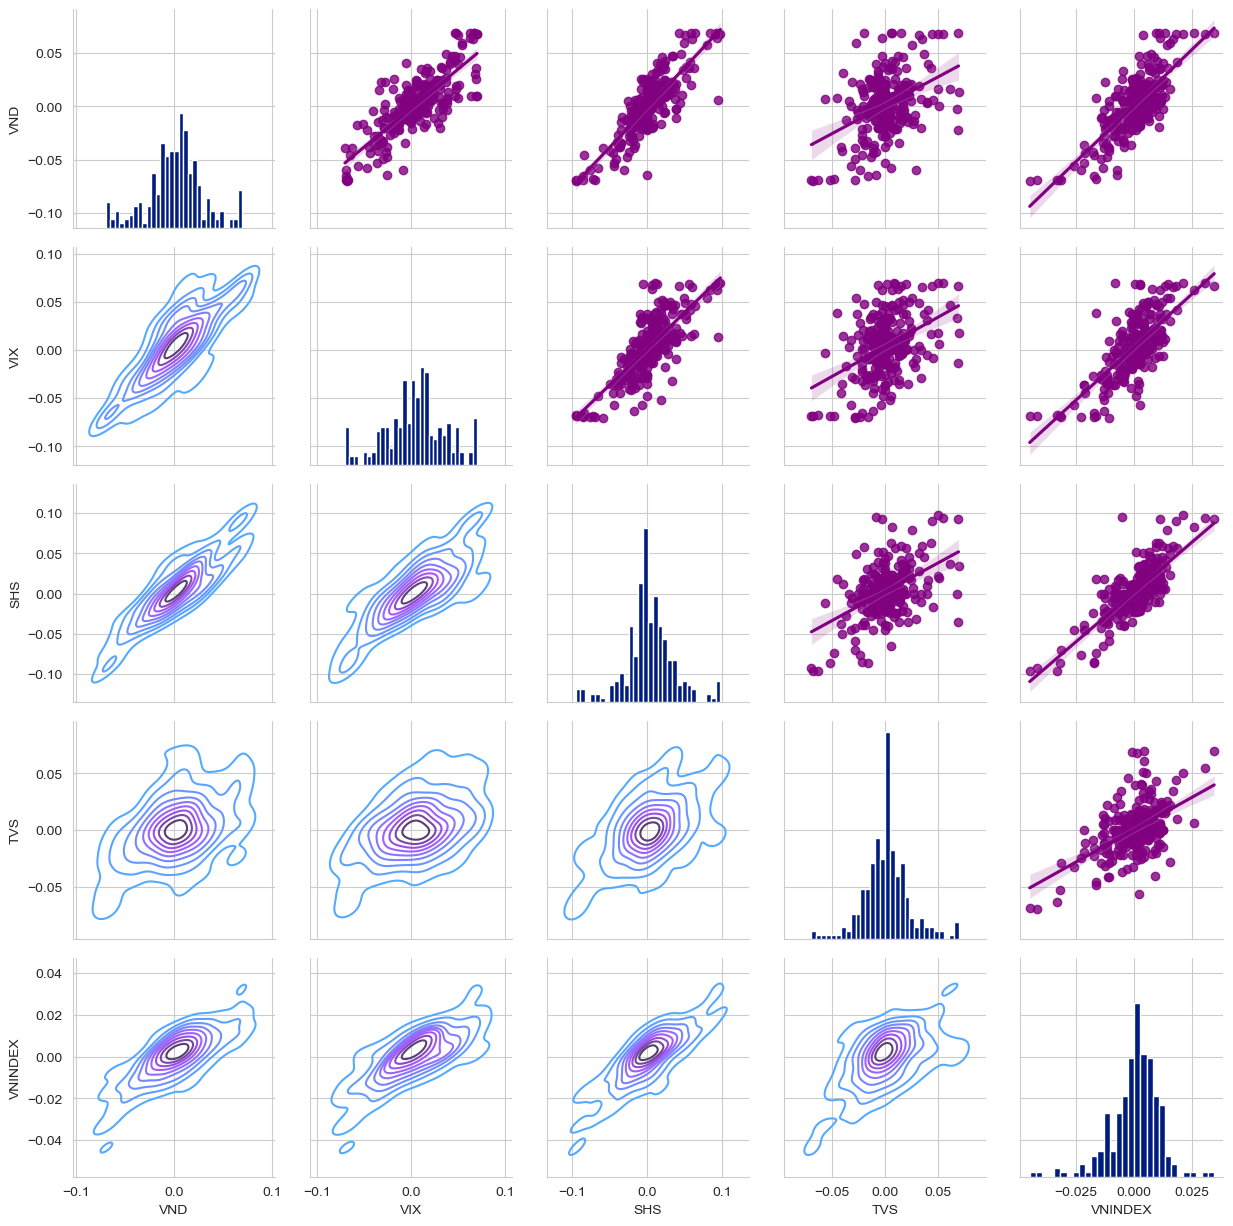

<Figure size 12800x9600 with 0 Axes>

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.reset_index().dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)
#output_file_path = 'corr_return.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

<Figure size 12800x9600 with 0 Axes>

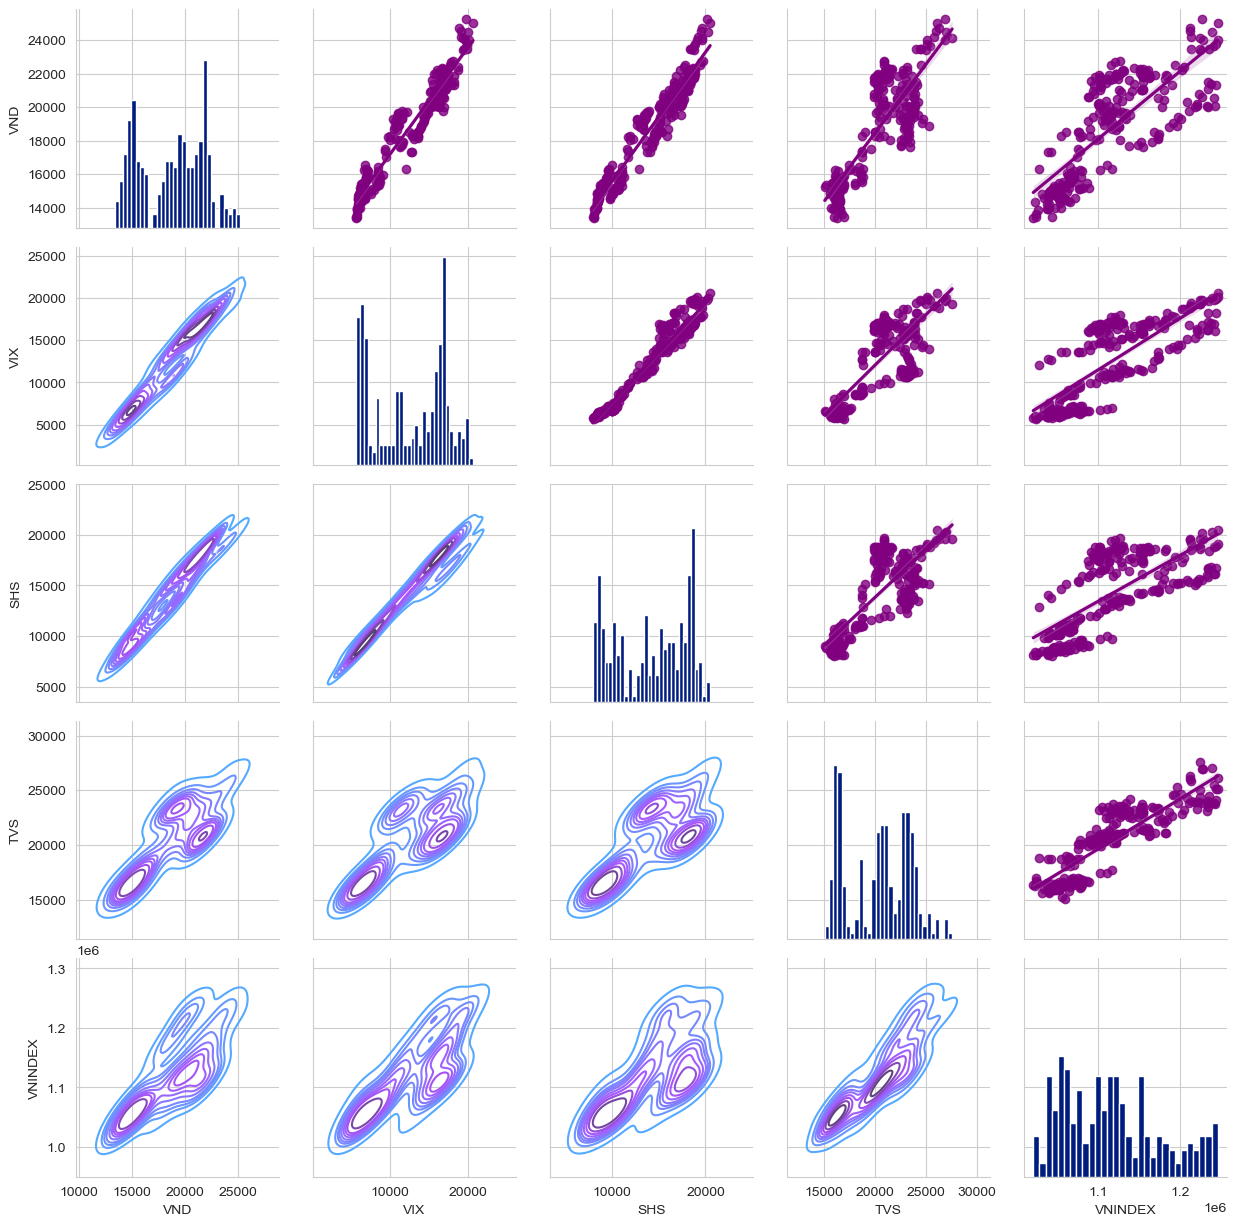

<Figure size 12800x9600 with 0 Axes>

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_df.reset_index())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)
#output_file_path = 'corr_closing.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

<Figure size 12800x9600 with 0 Axes>

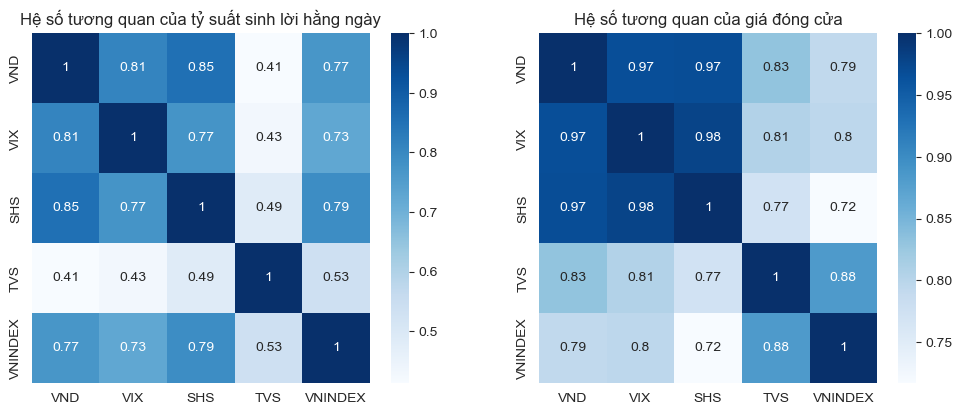

<Figure size 12800x9600 with 0 Axes>

In [22]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='Blues')
plt.title('Hệ số tương quan của tỷ suất sinh lời hằng ngày')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')
plt.title('Hệ số tương quan của giá đóng cửa')
#output_file_path = 'corr_return_close.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

- Tất cả 2 số liệu tỷ suất sinh lợi hằng ngày và giá đóng cửa của các mã cổ phiếu, chỉ số đều có hệ số tương quan dương.
- Hệ số tương quan tỷ suất sinh lời hằng ngày của TVS có độ lớn vừa phải với VNINDEX và 3 cổ phiếu còn lại.
- SHS có hệ số tương quan tỷ suất sinh lời hằng ngày với VNINDEX lớn nhất với giá trị là 0.79, tiếp theo đó là VND với giá trị 0.77 . 
- TVS có hệ số tương quan giá đóng cửa với VNINDEX lớn nhất với giá trị là 0.88. 


<Figure size 12800x9600 with 0 Axes>

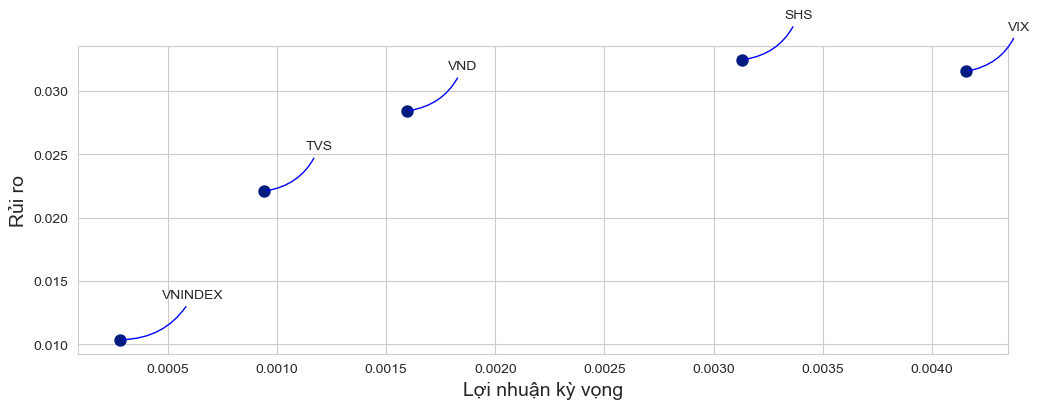

<Figure size 12800x9600 with 0 Axes>

In [23]:
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(12, 4))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Lợi nhuận kỳ vọng', fontsize = 14)
plt.ylabel('Rủi ro', fontsize = 14)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(30, 30), 
                 textcoords='offset points', 
                 arrowprops=dict(arrowstyle='-', 
                                 color='blue', 
                                 connectionstyle='arc3,rad=-0.3')
                )
#output_file_path = 'return_mean_std.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

Tôi thực hiện minh hoạ phương pháp này với mã cổ phiếu VIX trước rồi sau đó áp dụng cách này cho các cổ phiếu còn lại với dữ liệu lịch sử giao dịch trong vòng 10 năm.


In [24]:
#end = datetime.now()
end = datetime(2024, 1, 22)
start = datetime(end.year - 10, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

data = vn.stock_historical_data('VIX', start, end, resolution='1D',
                                type='stock').set_index("time")
data.head()


open  high   low  close  volume ticker
time                                              
2014-01-22  1610  1610  1540   1540   28800    VIX
2014-01-23  1540  1540  1540   1540       0    VIX
2014-01-24  1540  1540  1540   1540       0    VIX
2014-01-27  1560  1560  1560   1560     900    VIX
2014-02-06  1420  1420  1420   1420     100    VIX

In [25]:
# Drop duplicate indices

data = data.loc[~data.index.duplicated(keep='first')]  

# Set the frequency to daily and forward fill missing values

data = data.asfreq('D', method='ffill')

data.close

time
2014-01-22     1540
2014-01-23     1540
2014-01-24     1540
2014-01-25     1540
2014-01-26     1540
              ...  
2024-01-18    17450
2024-01-19    17350
2024-01-20    17350
2024-01-21    17350
2024-01-22    17350
Freq: D, Name: close, Length: 3653, dtype: int32

In [26]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [27]:
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-dark-palette')

Trước tiên tôi thực hiện phân tích phân rã (decomposition) theo mô hình nhân của chuỗi thời gian. 

Phân tích phân rã giúp chia nhỏ chuỗi thời gian thành các thành phần chính như trend (xu hướng), seasonality (mùa vụ), và residue (phần dư).

<Figure size 640x480 with 0 Axes>

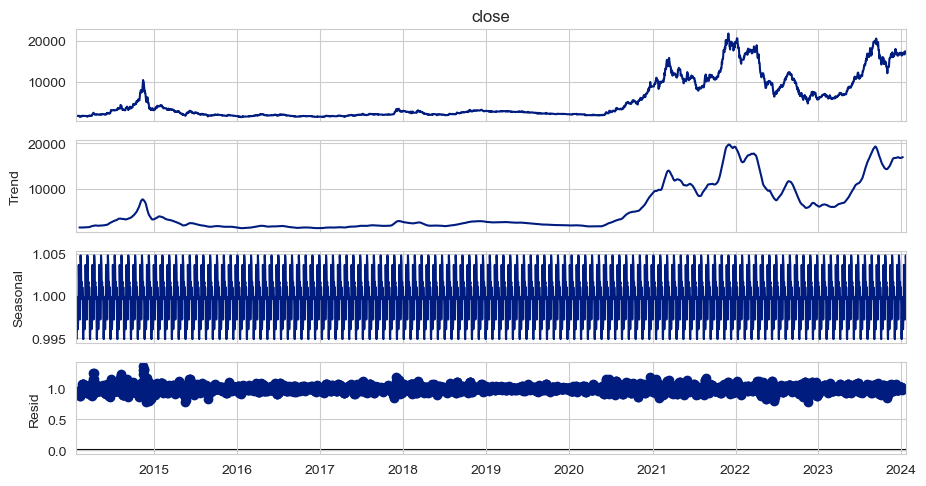

<Figure size 5120x3840 with 0 Axes>

In [28]:
# Checking decomposition of trend, seasonality and residue of the original time series.
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(data['close'], 
                                       model='multiplicative', 
                                       period=30)

fig = plt.figure()  
fig = decomposition.plot()
plt.figure(dpi=800)
fig.set_size_inches(10, 5)

plt.show()  # Display the plot


#output_file_path = 'seasonal_decompose.png'
#fig.savefig(output_file_path, format='png', bbox_inches='tight')

plt.close(fig)  # Close the plot


Dữ liệu giá đóng cửa VIX có yếu tố xu hướng và yếu tố mùa vụ. 

Để phù hợp với mô hình thì dữ liệu đầu vào của mình phải là một dữ liệu ổn định (stationary), do đó ta cần phải kiểm tra dữ liệu của mình thông qua các kiểm định về tính ổn định đó là kiểm định ADF và KPSS.

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -1.115225
p-value: 0.708962
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 5.456972
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\4112367772.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


<Figure size 2400x600 with 0 Axes>

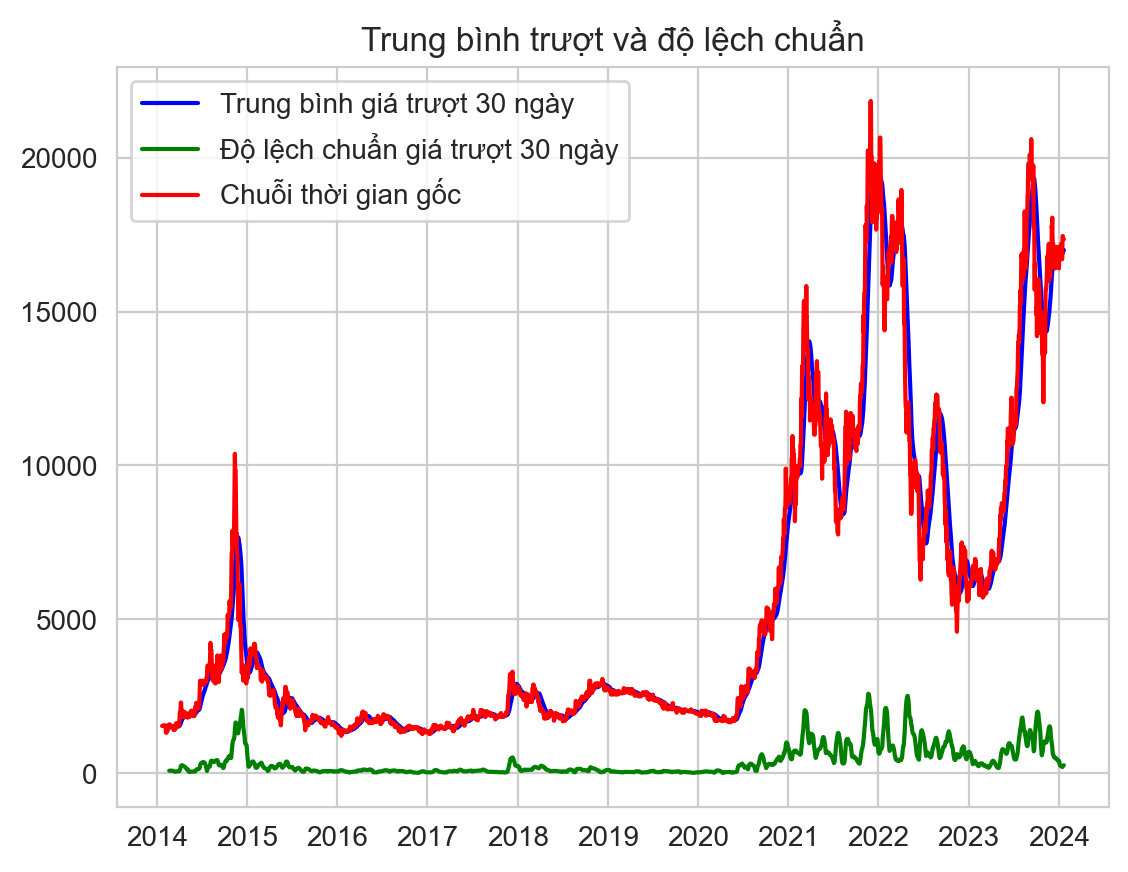

<Figure size 12800x9600 with 0 Axes>

In [29]:
#Testing for stationarity using ADF and KPSS Tests.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.figure(dpi=200)
    plt.plot(rolling_mean, color='blue', label='Trung bình giá trượt 30 ngày')
    plt.plot(rolling_std_dev, color='green', label = 'Độ lệch chuẩn giá trượt 30 ngày')
    plt.plot(stock_close_price, color='red',label='Chuỗi thời gian gốc')
    plt.legend(loc='best')
    plt.title('Trung bình trượt và độ lệch chuẩn')
    #output_file_path = 'rolling_mean_std_close.png'
    #plt.savefig(output_file_path, format='png', bbox_inches='tight')
    plt.figure(dpi=2000)
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(data['close'])

- ADF Test (Augmented Dickey-Fuller): Giá trị p lớn hơn mức ý nghĩa 0.05, vì vậy chúng ta không thể bác bỏ giả thuyết không (Not Stationary). 
- KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin): Giá trị p nhỏ hơn mức ý nghĩa 0.05, vì vậy chúng ta bác bỏ giả thuyết không ( Stationary). 


Theo biểu đồ ta có độ lệch chuẩn biến động mạnh và  kết quả của 2 kiểm định giả thuyết trên đều cũng cố cho chuỗi dữ liệu có thể không ổn định. 

Do đó ta cần phải biến đổi dữ liệu về dạng ổn định. Ta có thể thấy giá đóng của trong vòng 10 năm của VIX không theo một xu hướng nhất định, vì thế để loại bỏ xu hướng tôi biến đối chúng đưa về cơ số tự nhiện bằng hàm log. 

Tuy nhiên dữ liệu vẫn còn yếu tố mùa vụ nên tôi tiếp tục khử mùa bằng cách lấy giá trị hiện tại trừ cho giá trị một tháng trước ( hay còn gọi là phương pháp “Differencing”). Kết hợp hai bước biến đổi, cho ra một dữ liệu có tính ổn định hơn.

In [30]:

data['Close_Log'] = np.log(data['close'])
data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
data['Close_Detrend'] = data['Close_Detrend'].dropna()
data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -6.032883
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.117468
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\1857922386.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


<Figure size 2400x600 with 0 Axes>

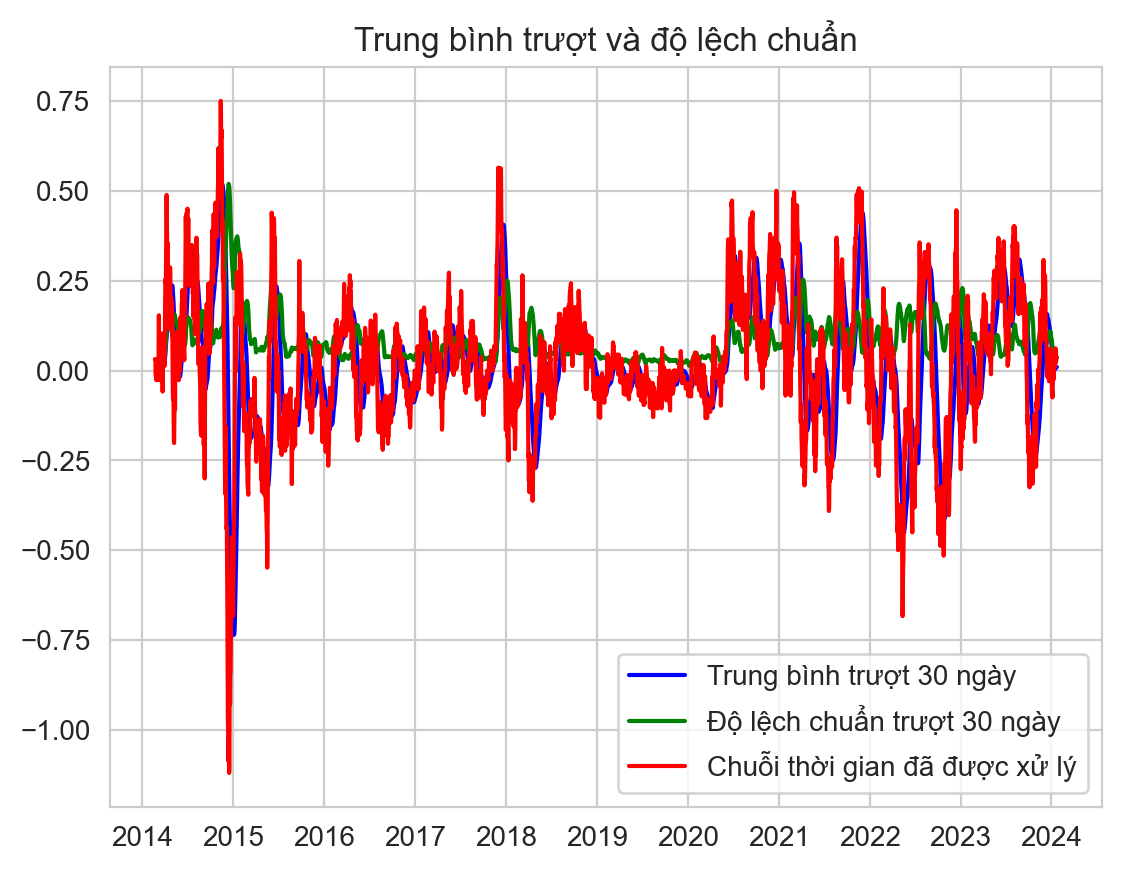

<Figure size 12800x9600 with 0 Axes>

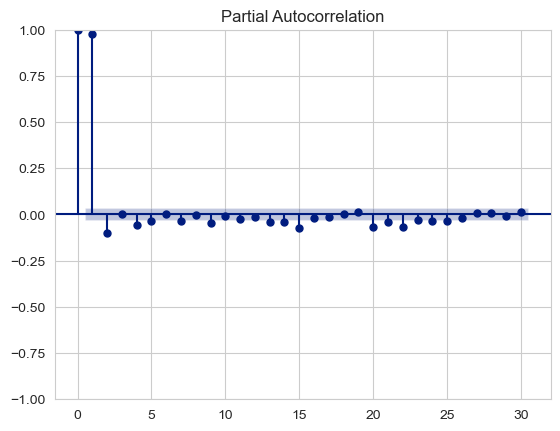

In [31]:
#Testing for stationarity of de-trended time series using ADF and KPSS Tests.
def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.figure(dpi=200)
    plt.plot(rolling_mean, color='blue', label='Trung bình trượt 30 ngày')
    plt.plot(rolling_std_dev, color='green', label = 'Độ lệch chuẩn trượt 30 ngày')
    plt.plot(stock_close_price, color='red',label='Chuỗi thời gian đã được xử lý')
    plt.legend(loc='best')
    plt.title('Trung bình trượt và độ lệch chuẩn')
    #output_file_path = 'rolling_mean_std_close_detrend.png'
    #plt.savefig(output_file_path, format='png', bbox_inches='tight')
    plt.figure(dpi=2000)
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

stationarity_test(data['Close_Detrend_log'].dropna())

# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['Close_Detrend_log'].dropna(), lags=30)


- ADF Test (Augmented Dickey-Fuller): Giá trị p nhỏ hơn cả 3 mức ý nghĩa 0,05 và 0,01. Vì vậy chúng ta có đủ bằng chứng mang ý nghĩa thống kê để bác bỏ giả thuyết không (Not Stationary) . 
- KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin): Giá trị p lớn hơn mức ý nghĩa 0.05, vì vậy chúng ta chưa thể bác bỏ giả thuyết không (Stationary).

Theo biểu đồ PACF, Chuỗi thời gian có mối tương quan với chính nó tại độ trễ 1.

Theo biểu đồ "Trung bình trượt và độ lệch chuẩn" ta có độ lệch chuẩn ổn định hơn và  kết quả của 2 kiểm định giả thuyết trên đều cũng cố cho chuỗi dữ liệu đã ổn định để có thể đưa vào mô hình.


Với dữ liệu trên, tôi lấy 15 ngày cuối cũng để làm tập dữ liệu kiểm tra và các ngày còn lại để huấn luyện mô hình. 

<Figure size 12800x9600 with 0 Axes>

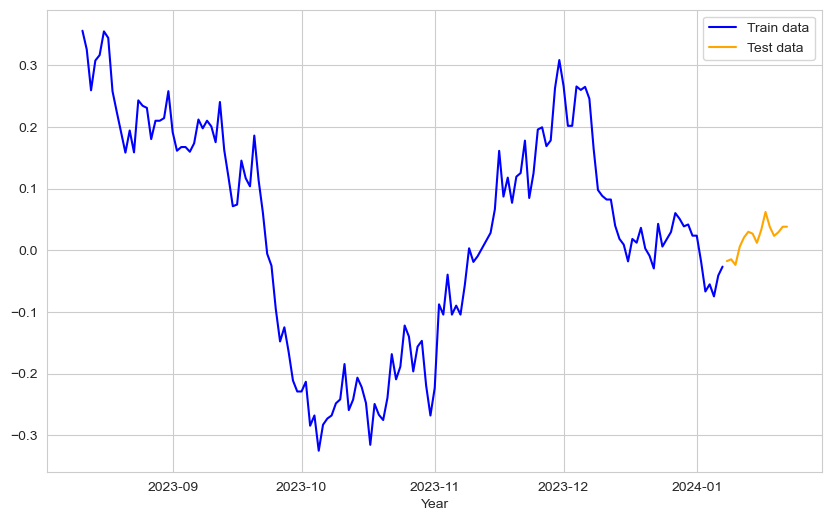

<Figure size 12800x9600 with 0 Axes>

In [32]:
#split data into train and training set
Stock_data_arima = data['Close_Detrend_log'].dropna()
test_size = 15
train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]


# Plotting the train and test sets.
plt.figure(figsize=(10,6))
plt.xlabel('Year')
#plt.ylabel('Closing Price')
plt.plot(train_data[-150:], 'blue', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
plt.legend()
#output_file_path = 'train_test.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

Tôi đã sử dụng phương pháp Auto ARIMA để tự động lựa chọn các tham số phù hợp cho mô hình ARIMA khi huấn luyện dữ liệu để dự đoán chuỗi thời gian. 

Điều này giúp giảm bớt công việc tìm kiếm thủ công tham số và tối ưu hóa hiệu suất của mô hình. Với các thông số “p” và “q” chạy từ 0 đến 3 để chọn ra mô hình có AIC (Tiêu chí thông tin Akaike) thấp nhất.

In [33]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1558.243, Time=0.46 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5582.739, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-8087.897, Time=2.04 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-9413.577, Time=2.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12640.877, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12674.490, Time=1.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-12672.498, Time=3.34 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-12679.076, Time=2.29 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12674.416, Time=0.94 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12672.417, Time=1.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-12705.590, Time=5.17 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-12685.172, Time=0.62 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-12672.416, Time=1.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-12671.285, Time=1.84 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-12671.077

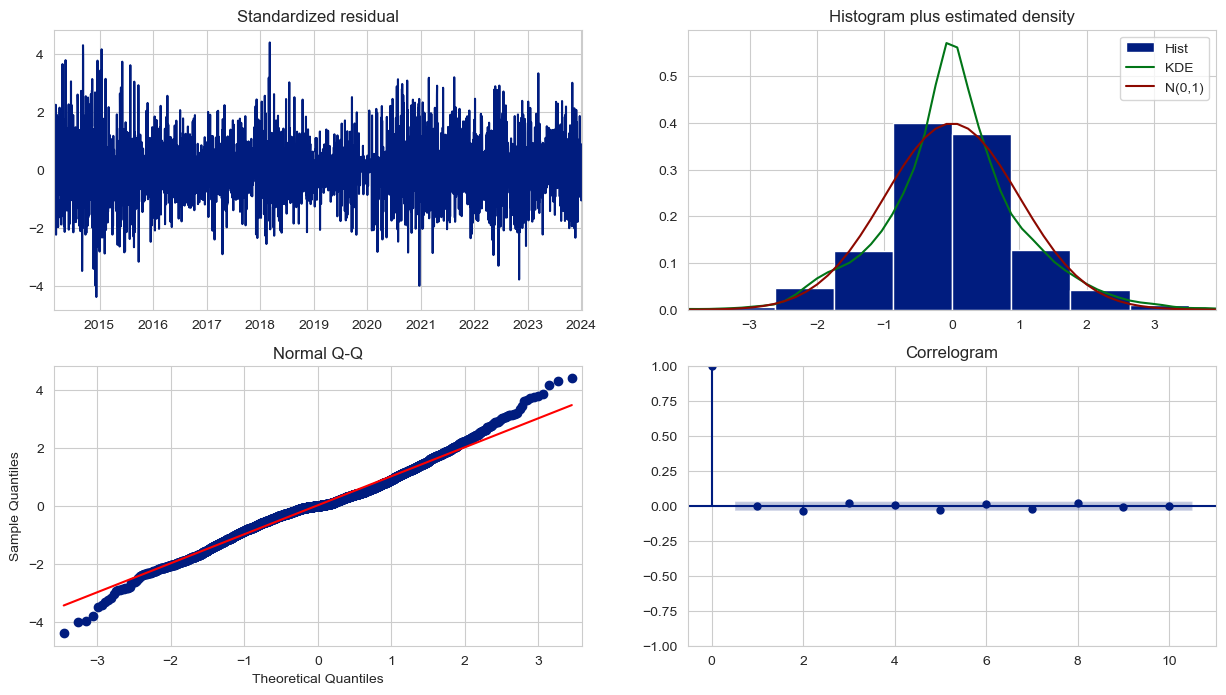

In [34]:

model = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)
print(model.summary())
model.plot_diagnostics(figsize=(15,8))

# Save the plot as a PNG file
#output_file_path = 'ARIMA_Diagnostics.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

Từ kết quả trên, ta có thể nhận xét các ý sau:
- Mô hình tốt nhất được chọn là ARIMA(2,0,2).
- Hệ số của các điều kiện AR và MA đều có ý nghĩa thống kê với giá trị p nhỏ hơn 0.05.
- Ljung-Box (L1) (Q) : 0.02, Prob(Q): 0.88 cho thấy không có tự tương quan đáng kể trong các sai số ở độ trễ 1, vì giá trị Q gần bằng 0 và xác xuất Q rất cao so với mức ý nghĩa.
- Jarque-Bera (JB): 235.41, Prob(JB): 0.00 có nghĩa là dữ liệu không tuân theo phân phối chuẩn, vì giá trị JB rất cao và xác suất JB rất thấp.
- Heteroskedasticity (H): 0.96, Prob(H) (two-sided): 0.51 có nghĩa là dữ liệu có phương sai đồng nhất, vì giá trị H gần bằng 1 và xác suất H cao hơn mức ý nghĩa.
- Skew: 0.13, Kurtosis: 4.23 có nghĩa là dữ liệu của có độ lệch nhẹ về phải và độ nhọn cao hơn phân phối chuẩn.


#### Biểu đồ chuẩn đoán:
- Standardized Residuals: Biểu đồ này thể hiện các giá trị dư chuẩn hóa theo thời gian (từ năm 2015 đến 2023). Nếu không có xu hướng hay mô hình nào trong dữ liệu (nghĩa là dữ liệu ngẫu nhiên), ta có thể mong đợi rằng giá trị dư sẽ không có mô hình và sẽ không có sự tự tương quan. Trong trường hợp này, cho thấy không có mô hình rõ ràng trong các giá trị dư.
- Histogram Plus Estimated Density: Biểu đồ này thể hiện phân phối của các giá trị dư. Nếu mô hình đã khớp tốt, chúng ta mong đợi rằng giá trị dư sẽ tuân theo phân phối chuẩn. Trong trường hợp này, cho thấy giá trị dư có phân phối gần với phân phối chuẩn, mặc dù có một số sai lệch nhỏ.
- Normal Q-Q: Biểu đồ này so sánh phân phối của các giá trị dư với phân phối chuẩn. Nếu các điểm nằm gần với đường thẳng màu đỏ, điều này cho thấy giá trị dư tuân theo phân phối chuẩn. Trong trường hợp này, các điểm nằm khá gần với đường thẳng màu đỏ , mặc dù có một số sai lệch ở đuôi, cho thấy giá trị dư có phân phối gần với phân phối chuẩn.
- Correlogram: Biểu đồ này thể hiện sự tự tương quan của các giá trị dư ở các độ trễ khác nhau. Nếu không có sự tự tương quan, chúng ta mong đợi rằng tất cả các thanh sẽ nằm trong vùng màu xanh lá cây (vùng tin cậy 95%). Trong trường hợp này, hầu hết các thanh đều nằm trong vùng màu xanh lá cây, cho thấy không có sự tự tương quan trong các giá trị dư, điều này gợi ý rằng sai số là biến ngẫu nhiên (white noise).

Tóm lại, dựa trên các biểu đồ chuẩn đoán này, mô hình ARIMA có vẻ đã khớp tốt với dữ liệu VIX.


In [35]:
prediction, confint = model.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)


In [36]:
cf= pd.DataFrame(confint)

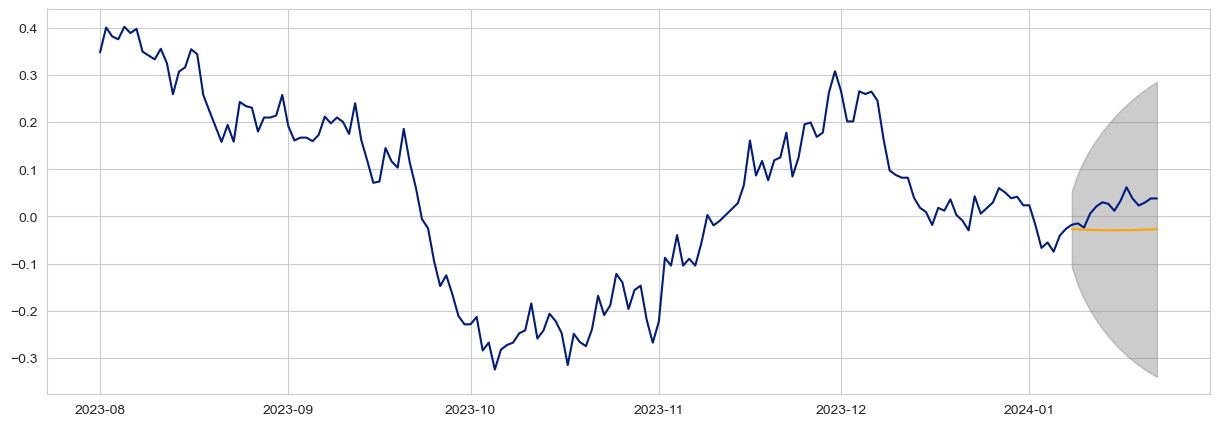

In [37]:
prediction_series = pd.Series(prediction,index=test_data.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima.last('6M'))
ax.plot(prediction_series, color = 'orange')
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.4)
# Save the plot as a PNG file
#output_file_path = 'ARIMA_TEST.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1579.391, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5620.514, Time=0.70 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-8135.129, Time=1.86 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-9466.918, Time=2.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12706.372, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12740.157, Time=1.67 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-12738.167, Time=1.98 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-12744.749, Time=2.51 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-12740.066, Time=0.75 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12738.070, Time=0.95 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-12765.080, Time=5.98 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-12751.033, Time=0.83 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-12738.068, Time=1.88 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-12736.962, Time=2.83 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-12736.436

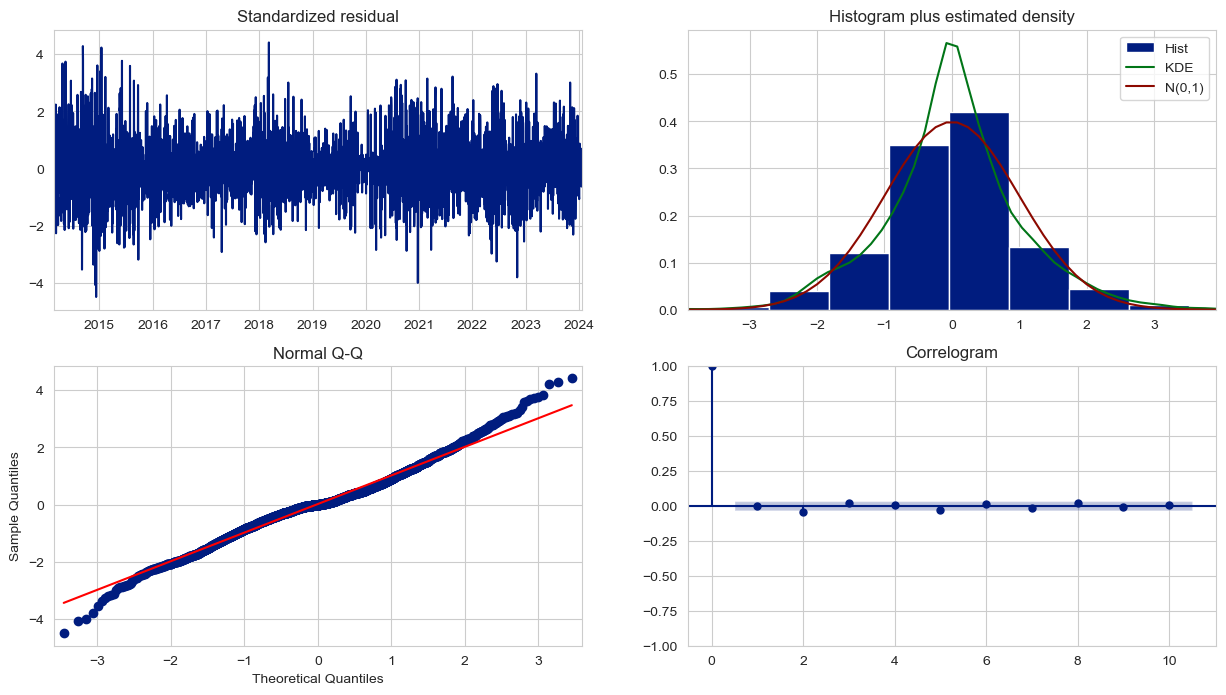

In [38]:
model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                   test='adf',
                   max_p=3, max_q=3,
                   m=1,
                   d=None,
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)

print(model.summary())
model.plot_diagnostics(figsize=(15, 8))
plt.show()

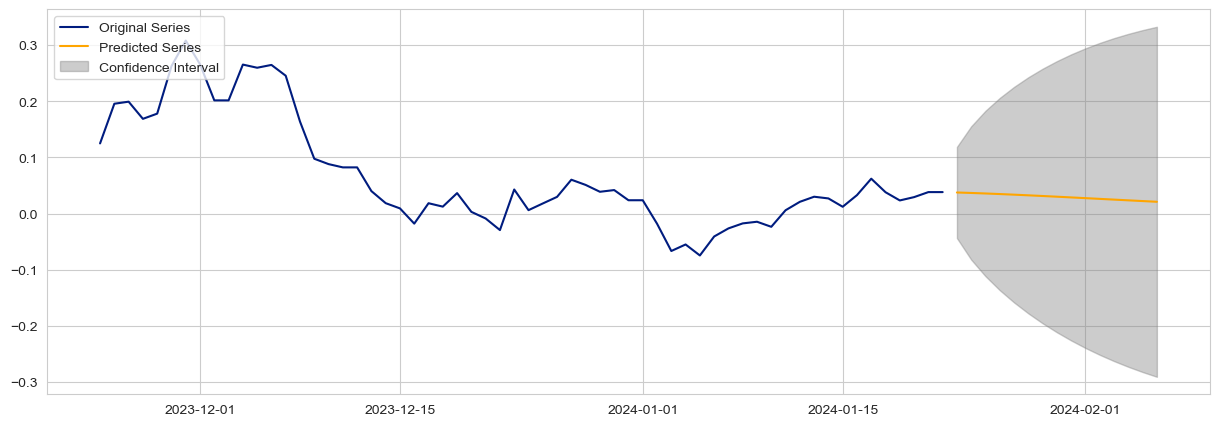

In [39]:
# Predict the next 180 days
forecast, confint = model.predict(n_periods=15, 
                                  alpha=0.05, 
                                  return_conf_int=True)

# Create a DataFrame for confidence intervals
cf = pd.DataFrame(confint, columns=['lower', 'upper'])

# Create a time index for the next 180 days
next_15_days_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                    + pd.DateOffset(1), 
                                    periods=15)

# Create a Series for the prediction with the new time index
prediction_series = pd.Series(forecast, index=next_15_days_index)

# Plot the original series and the predicted series with confidence intervals
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima[-60:], label='Original Series')
ax.plot(prediction_series, label='Predicted Series', color = 'orange')
ax.fill_between(prediction_series.index, 
                cf['lower'], cf['upper'], 
                color='grey', alpha=0.4, 
                label='Confidence Interval')
ax.legend(loc = 'upper left')

# Save the plot as a PNG file
output_file_path = 'ARIMA_predict_15.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

In [40]:
returns =  100* data.close.pct_change().dropna()

Text(0.5, 1.0, 'VIX Returns')

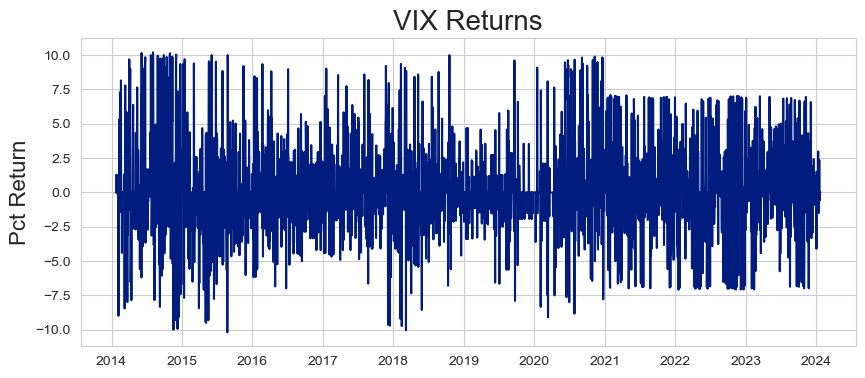

In [41]:

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('VIX Returns', fontsize=20)

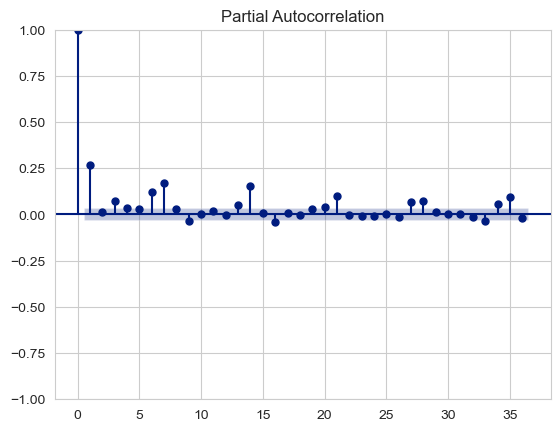

In [42]:
plot_pacf(returns**2)


#output_file_path = 'PACF_RET.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')


plt.show()
plt.close()

In [43]:
from arch import arch_model
model = arch_model(returns, p=1, q=1)

In [44]:

model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8394708494.457312
Iteration:      2,   Func. Count:     14,   Neg. LLF: 17337.98271356517
Iteration:      3,   Func. Count:     23,   Neg. LLF: 11471.683738581323
Iteration:      4,   Func. Count:     31,   Neg. LLF: 9000.497916047132
Iteration:      5,   Func. Count:     37,   Neg. LLF: 8959.855920472943
Iteration:      6,   Func. Count:     43,   Neg. LLF: 8959.461427992042
Iteration:      7,   Func. Count:     48,   Neg. LLF: 8959.459906648699
Iteration:      8,   Func. Count:     53,   Neg. LLF: 8959.459838742992
Iteration:      9,   Func. Count:     58,   Neg. LLF: 8959.459803102838
Iteration:     10,   Func. Count:     62,   Neg. LLF: 8959.459803102223
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8959.459803102838
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8959.46
Distribution:                  Normal   AIC:                           17926.9
Method:            Maximum Likelihood   BIC:                           17951.7
                                        No. Observations:                 3652
Date:                Tue, Jan 30 2024   Df Residuals:                     3651
Time:                        16:24:34   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1015  4.448e-02      2.282  2.251e-02 [1.431e-02,  0.189]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.1285  8.980e-02      1.431      0.152  [-4.751e-02,  0.304]
alpha[1]       0.0455  1.321e-02      3.442  5.779e-04 [1.957e-02,7.136e-02]
beta[1]        0.9400  2.244e-02     41.889      0.000     [  0.896,  0.984]
============================================================================

Covariance estimator: robust
"""

In [46]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [47]:
rolling_predictions = pd.Series(rolling_predictions, 
                                index=returns.index[-365:])

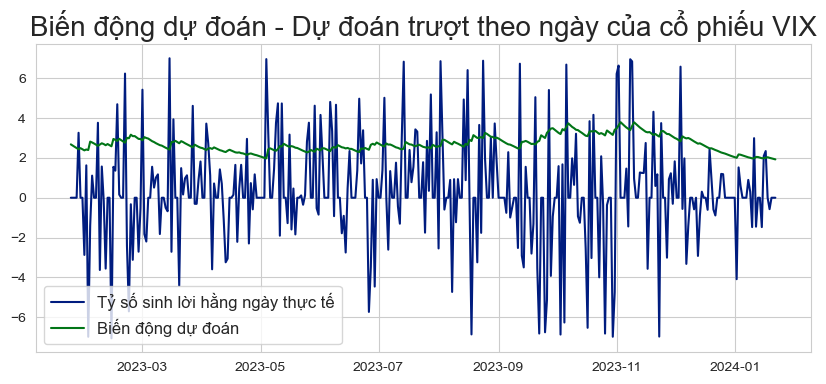

In [48]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Biến động dự đoán - Dự đoán trượt theo ngày của cổ phiếu VIX', fontsize=20)
plt.legend(['Tỷ số sinh lời hằng ngày thực tế', 'Biến động dự đoán'],
           loc = 'lower left', fontsize=12)
# Save the plot as a PNG file
#output_file_path = 'Garch_roll.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

In [49]:
from datetime import timedelta

pred = model_fit.forecast(horizon=15)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,16)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

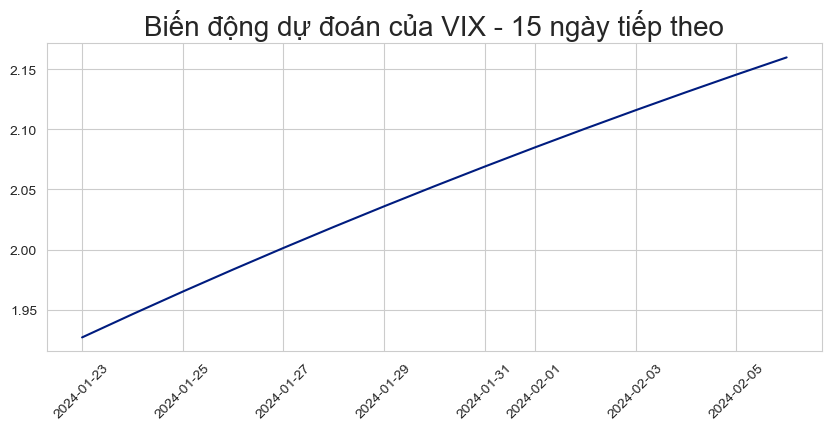

In [50]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.xticks(rotation = 45)
plt.title('Biến động dự đoán của VIX - 15 ngày tiếp theo', fontsize=20)
#output_file_path = 'Garch_15.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
#plt.close()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4407.444, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8756.552, Time=1.52 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-11117.422, Time=2.12 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-12664.519, Time=3.77 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-16096.840, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-16096.089, Time=0.92 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-16094.780, Time=0.66 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-16113.517, Time=0.51 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-16096.049, Time=0.94 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-16097.150, Time=3.46 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-16093.928, Time=0.72 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-16113.249, Time=0.86 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-16095.261, Time=1.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-16104.107, Time=5.72 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-16090.1

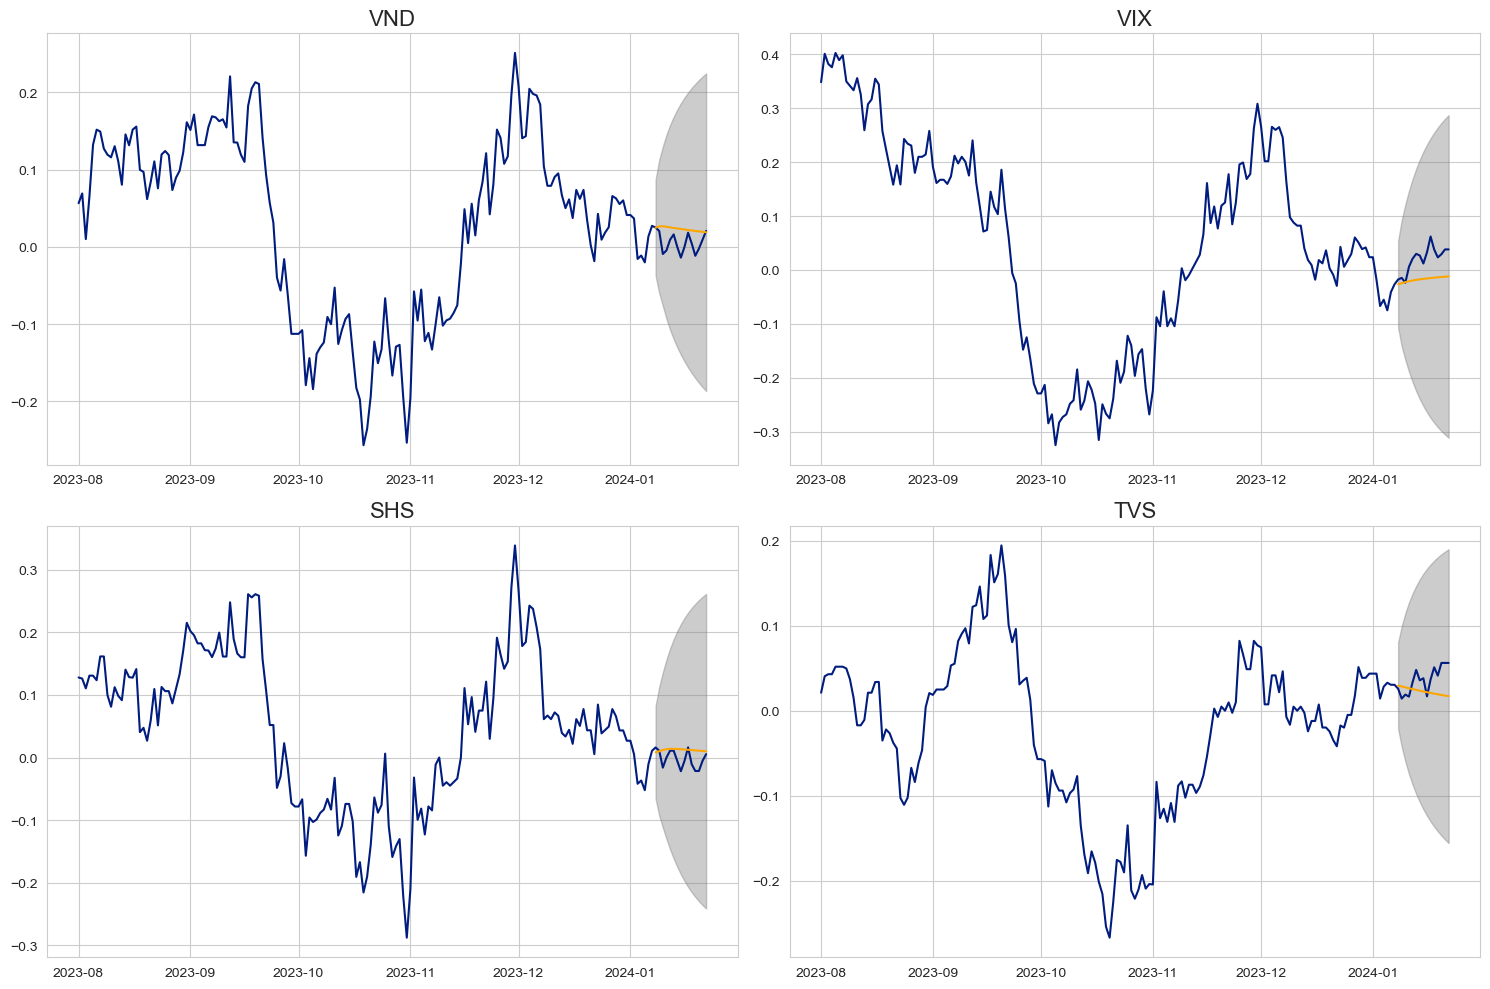

In [51]:
import math
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from datetime import datetime 
import vnstock as vn

# List of stock codes
last_stock_list = ["VND", "VIX", "SHS", "TVS"]

#end = datetime.now()
end = datetime(2024, 1, 22)
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

# Determine the number of rows for the subplot
n = len(last_stock_list)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D', type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])
    data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
    data['Close_Detrend'] = data['Close_Detrend'].dropna()
    data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))
    

    Stock_data_arima = data['Close_Detrend_log'].dropna()
    test_size = 15
    train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]

    model = auto_arima(train_data, start_p=0, start_q=0,
                          test='adf',       
                          max_p=3, max_q=3, 
                          m=1,              
                          d=None,           
                          seasonal=False,   
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=False)

    prediction, confint = model.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)
    cf= pd.DataFrame(confint)

    prediction_series = pd.Series(prediction,index=test_data.index)

    ax = axs[i//ncols, i%ncols]
    ax.plot(Stock_data_arima.last('6M'))
    ax.plot(prediction_series, color = 'orange')
    ax.fill_between(prediction_series.index, cf[0], cf[1], color='grey', alpha=.4)
    ax.set_title(stock_code, fontsize = 16)

plt.tight_layout()
#output_file_path = 'ARIMA_ALL_TEST.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4438.979, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8804.183, Time=0.99 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-11173.539, Time=2.71 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-12726.617, Time=3.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-16169.845, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-16169.082, Time=1.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-16167.830, Time=0.50 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-16186.437, Time=0.76 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-16169.041, Time=0.81 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=4.86 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-16167.062, Time=1.01 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-16186.242, Time=0.93 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-16168.319, Time=1.44 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-16171.532, Time=2.44 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=5.72 

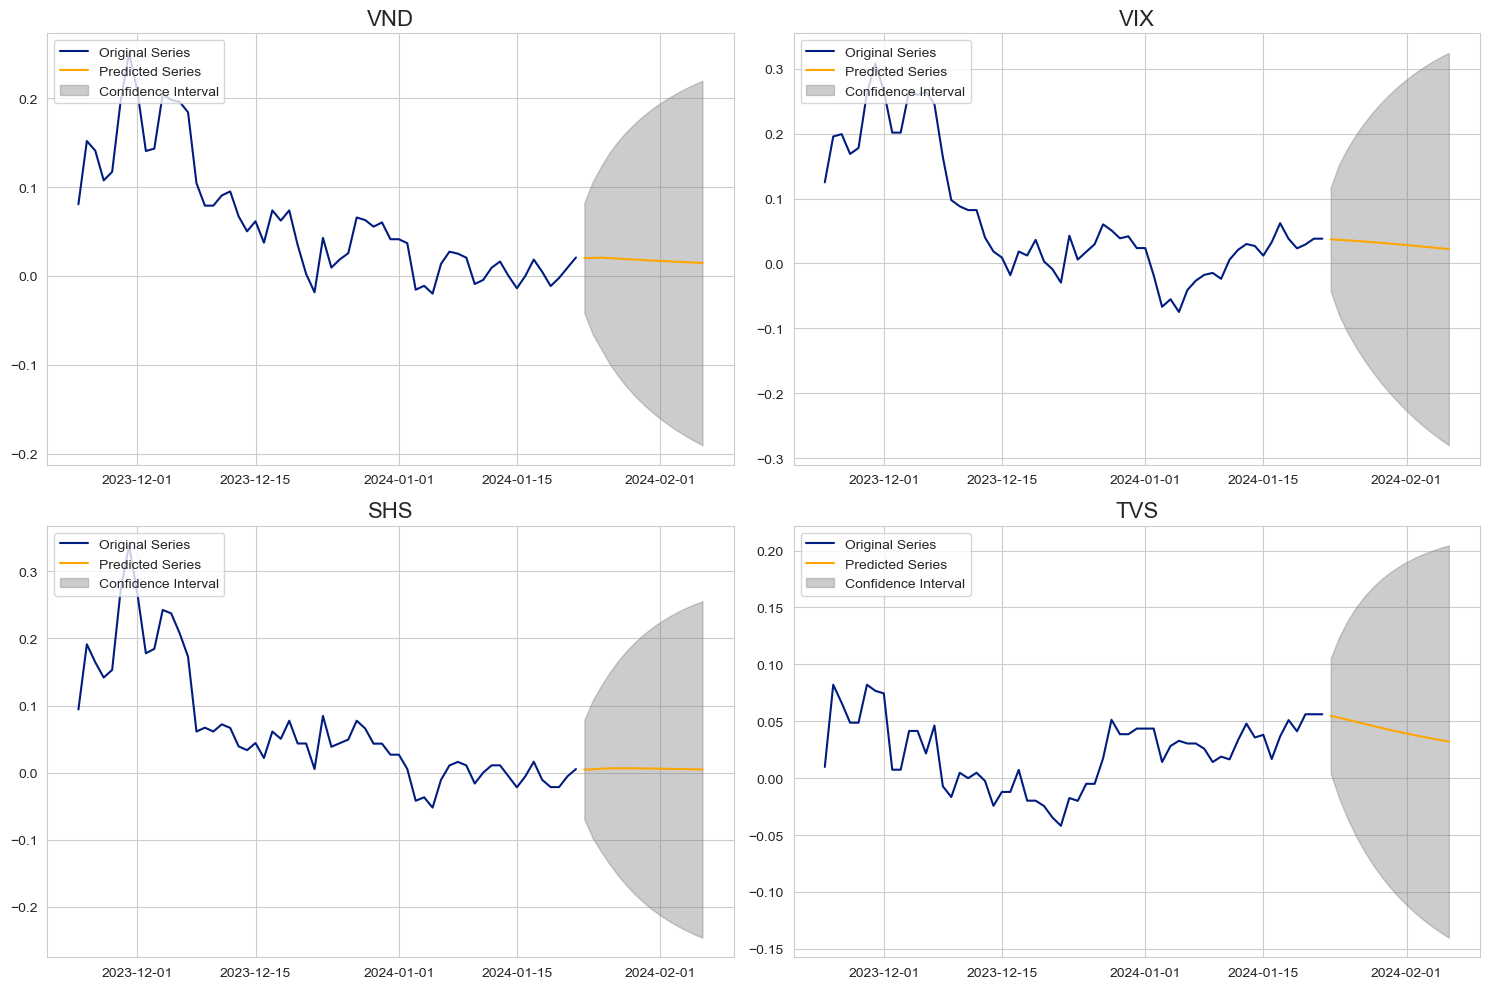

In [52]:
from pmdarima import auto_arima
from datetime import datetime 
import vnstock as vn
import math
import matplotlib.pyplot as plt

# List of stock codes
last_stock_list = ["VND", "VIX", "SHS", "TVS"]

#end = datetime.now()
end = datetime(2024, 1, 22)
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')
test_size = 15

fig, axs = plt.subplots(math.ceil(len(last_stock_list) / 2), 2, figsize=(15, 5 * math.ceil(len(last_stock_list) / 2)))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])
    data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
    data['Close_Detrend'] = data['Close_Detrend'].dropna()
    data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))


    Stock_data_arima = data['Close_Detrend_log'].dropna()
    train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]

    model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                       test='adf',
                       max_p=3, max_q=3,
                       m=1,
                       d=None,
                       seasonal=False,
                       start_P=0,
                       D=0,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise= False)

    forecast, confint = model.predict(n_periods=15, 
                                      alpha=0.05, 
                                      return_conf_int=True)

    cf = pd.DataFrame(confint, columns=['lower', 'upper'])
    next_15_days_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                        + pd.DateOffset(1), 
                                        periods=15)
    prediction_series = pd.Series(forecast, index=next_15_days_index)

    ax = axs[i // 2, i % 2]
    ax.plot(Stock_data_arima[-60:], label='Original Series')
    ax.plot(prediction_series, label='Predicted Series', color = 'orange')
    ax.fill_between(prediction_series.index, 
                    cf['lower'], cf['upper'], 
                    color='grey', alpha=0.4, 
                    label='Confidence Interval')
    ax.legend(loc = 'upper left')
    ax.set_title(stock_code, fontsize = 16)

plt.tight_layout()
#output_file_path = 'ARIMA_ALL_FORC.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()

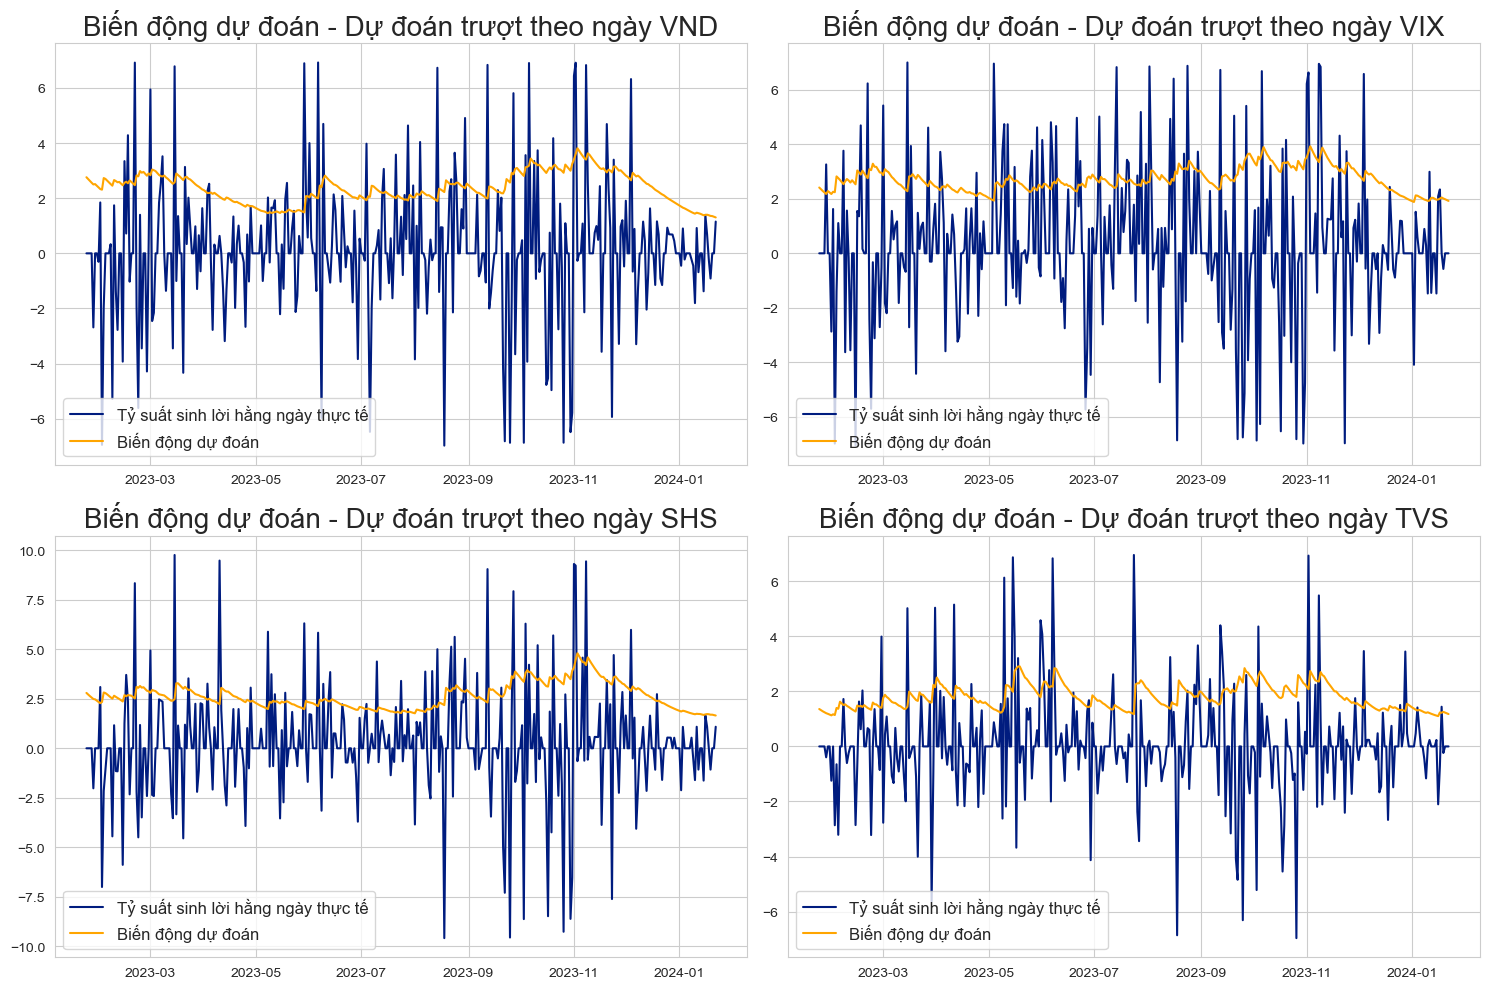

In [53]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime 
from dateutil.relativedelta import relativedelta
from arch import arch_model
import vnstock as vn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#end = datetime.now()
end = datetime(2024, 1, 22)
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

last_stock_list = ["VND", "VIX", "SHS", "TVS"]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  

    # Set the frequency to daily and forward fill missing values
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])

    returns =  100* data.close.pct_change().dropna()

    rolling_predictions = []
    test_size = 365

    for j in range(test_size):
        train = returns[:-(test_size-j)]
        model = arch_model(train, p=1, q=1)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
    rolling_predictions = pd.Series(rolling_predictions, 
                                    index=returns.index[-365:])
    ax = axs[i//2, i%2]
    true, = ax.plot(returns[-365:])
    preds, = ax.plot(rolling_predictions, color = 'orange')
    ax.set_title('Biến động dự đoán - Dự đoán trượt theo ngày ' + stock_code, fontsize=20)
    ax.legend(['Tỷ suất sinh lời hằng ngày thực tế', 'Biến động dự đoán'],
               loc = 'lower left', fontsize=12)

plt.tight_layout()
#output_file_path = 'GARCH_ALL_TEST.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()

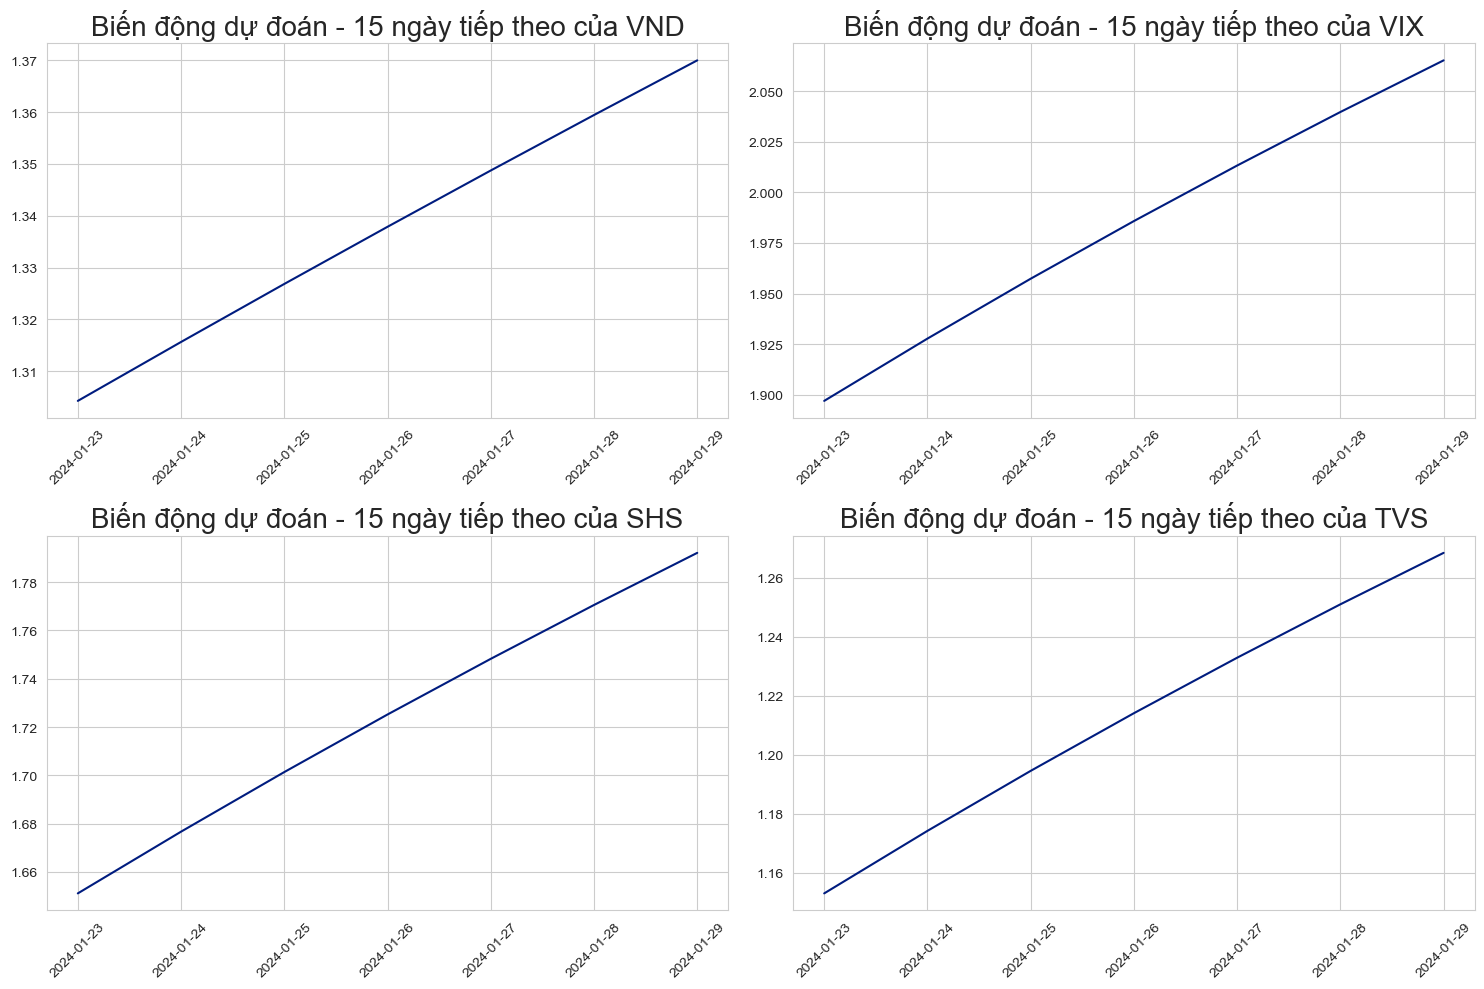

In [54]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta 
from dateutil.relativedelta import relativedelta
from arch import arch_model
import vnstock as vn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#end = datetime.now()
end = datetime(2024, 1, 22)
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

last_stock_list = ["VND", "VIX", "SHS", "TVS"]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  

    # Set the frequency to daily and forward fill missing values
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])

    returns =  100* data.close.pct_change().dropna()

    model = arch_model(returns, p=1, q=1)
    model_fit = model.fit(disp='off')

    pred = model_fit.forecast(horizon=7)
    future_dates = [returns.index[-1] + timedelta(days=j) for j in range(1,8)]
    pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

    ax = axs[i//2, i%2]
    ax.plot(pred)
    ax.set_title('Biến động dự đoán - 15 ngày tiếp theo của ' + stock_code, fontsize=20)
    ax.set_xticks(pred.index)
    ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pred.index], rotation=45)

plt.tight_layout()
#output_file_path = 'GARCH_ALL_FORC.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()
